# <ins>Churn-Prediction</ins>
Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

In [35]:
# import libraries
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model    import LogisticRegression
from xgboost                 import XGBClassifier
from sklearn.svm             import SVC

## <ins>Load data and initial exploration </ins>

In [36]:
df = pd.read_csv("Data/Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## <ins> Data cleaning and Feature Engineering</ins>
In the following we check whether there are missing values ​​and carry out initial cleanups. We also convert categorical variables with One-Hot-Encoding.

In [39]:
# check NaN-values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [40]:
# check duplicates
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [41]:
# remove unnecessary columns
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1)

In [42]:
# copy dataframe before converting
df_viz = df.copy()

# convert categorical variables (one-hot encoding)
df = pd.get_dummies(df, columns=["Geography", "Gender", "Card Type"], drop_first = False)

In [43]:
df.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France         bool
Geography_Germany        bool
Geography_Spain          bool
Gender_Female            bool
Gender_Male              bool
Card Type_DIAMOND        bool
Card Type_GOLD           bool
Card Type_PLATINUM       bool
Card Type_SILVER         bool
dtype: object

## <ins>Data analysis and Visualization</ins>

In [44]:
# proportion of each unique value in 'Exited' column
df['Exited'].value_counts(normalize = True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

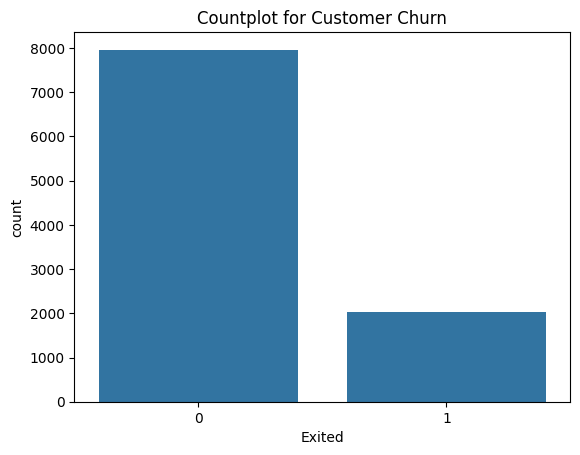

In [45]:
#countplot for exited customers
sns.countplot(x = 'Exited', data = df)
plt.title("Countplot for Customer Churn")
plt.show()

The visualization shows that **Class 0** (non-exited customers) is the dominant class, resulting in an **unbalanced distribution** of the data.

<strong><ins>Possible effects:</ins></strong>
- **Machine Learning Models**: An imbalanced distribution can lead to models favoring the majority class (Class 0) and potentially underperforming on the minority class (Class 1).

- **Choosing a more robust model**: Given the unbalanced distribution, it might make sense to choose a more robust model such as `Random Forest`, `XGBoost` or `Logistic Regression` with Regularization, as these models can handle the imbalance data better and are less likely to focus too much on the majority class.

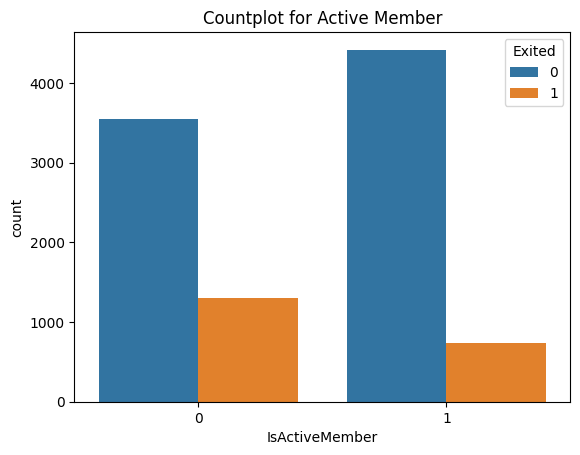

In [46]:
# countplot for active member
sns.countplot(x = df['IsActiveMember'], hue = df['Exited'])
plt.title("Countplot for Active Member")
plt.show()

- As shown in the countplot active customers are less likely to leave the bank than inactive customers.

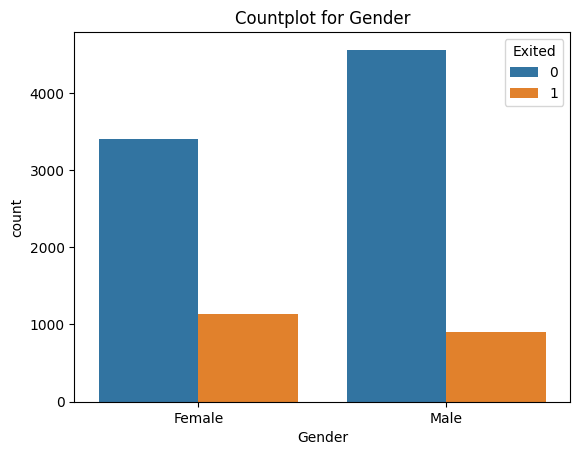

In [47]:
# countplot for Gender
sns.countplot(x = df_viz['Gender'], hue = df['Exited'])
plt.title("Countplot for Gender")
plt.show()

- Females leave the bank more often than Males

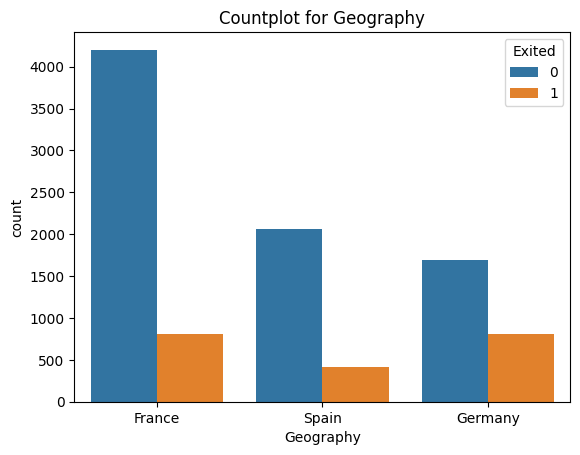

In [48]:
# countplot for Geography
sns.countplot(x = df_viz['Geography'], hue = df['Exited'])
plt.title("Countplot for Geography")
plt.show()

- customers from **Germany** leave the bank the most
- followed by **France**, who have the most customers
- customers from **Spain** are less likely to leave the bank

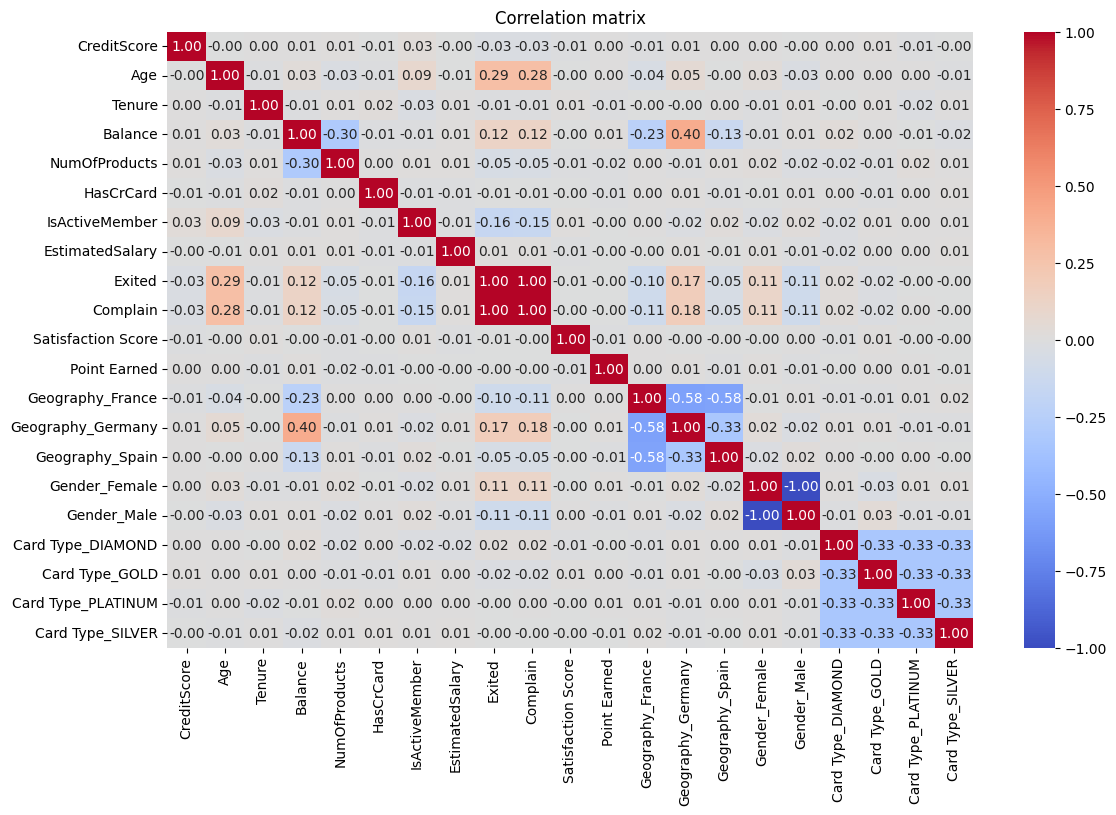

In [49]:
# correlation matrix
plt.figure(figsize = (13, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation matrix")
plt.show()

- there is a perfect correlation = 1 between `Complain` and the target feature `Exited`. 
- the feature `Complain` will not be included, because the machine learning model will primarily learn from `Complain` to predict churn.

In [50]:
# remove feature 'Complain'
df = df.drop(["Complain"], axis = 1)

In [51]:
# data for customers who have churned (Exited = 1)
churned_df = df[df["Exited"] == 1]

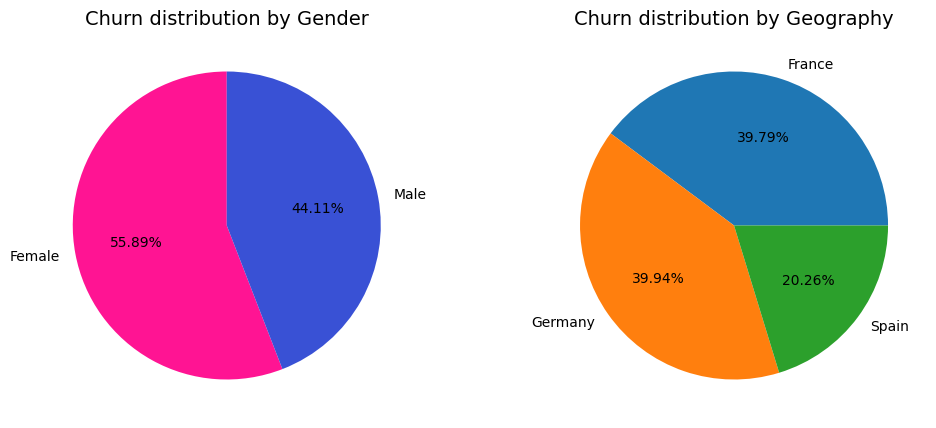

In [52]:
# plotting pie-chart for churned Gender and Geography 
plt.figure(figsize = (12, 5))

# pie-Chart for Gender (customers who left)
gender_counts = churned_df["Gender_Male"].value_counts()
labels_gender = ["Female", "Male"]
colors        = ["deeppink", "#3951d5"]

# plotting gender churn
plt.subplot(1, 2 , 1)
plt.pie(gender_counts, labels = labels_gender, autopct = "%1.2f%%", startangle = 90, colors = colors)
plt.title("Churn distribution by Gender", fontsize = 14)

#--------------------------------------------

# pie-Chart for Geography (exited))
geo_counts = churned_df[["Geography_France", "Geography_Germany", "Geography_Spain"]].sum()
labels_geo = ["France", "Germany", "Spain"] 

# number of customers per country
geo_value = [geo_counts["Geography_France"], geo_counts["Geography_Germany"], geo_counts["Geography_Spain"]]

# plotting Geography churn
plt.subplot(1, 2, 2)
plt.pie(geo_value, labels = labels_geo, autopct = "%1.2f%%")
plt.title("Churn distribution by Geography", fontsize = 14)
plt.show()

- Females are likely to leave the bank comparing to males with 11,78% more.
- Customers from France and Germany are almost even and leave the bank most in compare to Spain

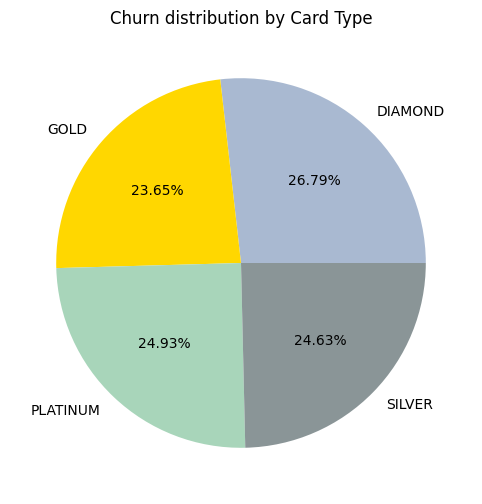

In [53]:
# pie-chart for churned Customer by CardType
card_type_counts = churned_df[['Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']].sum()
card_type_labels = card_type_counts.index.str.replace("Card Type_", "") 
colors           = ['#A9B9D1', '#FFD700', '#A8D5BA', '#8A9597'] # color for: DIAMOND, GOLD, PLATINUM, SILVER

# plotting pie-chart 
plt.figure(figsize = (10,6))
plt.pie(card_type_counts, labels = card_type_labels, autopct='%1.2f%%', colors = colors)
plt.title("Churn distribution by Card Type")
plt.show()

The chart shows a relatively even distribution of card types, with `DIAMOND` at the top, followed by `PLATINUM` and `SILVER`, while `GOLD` has the smallest share.

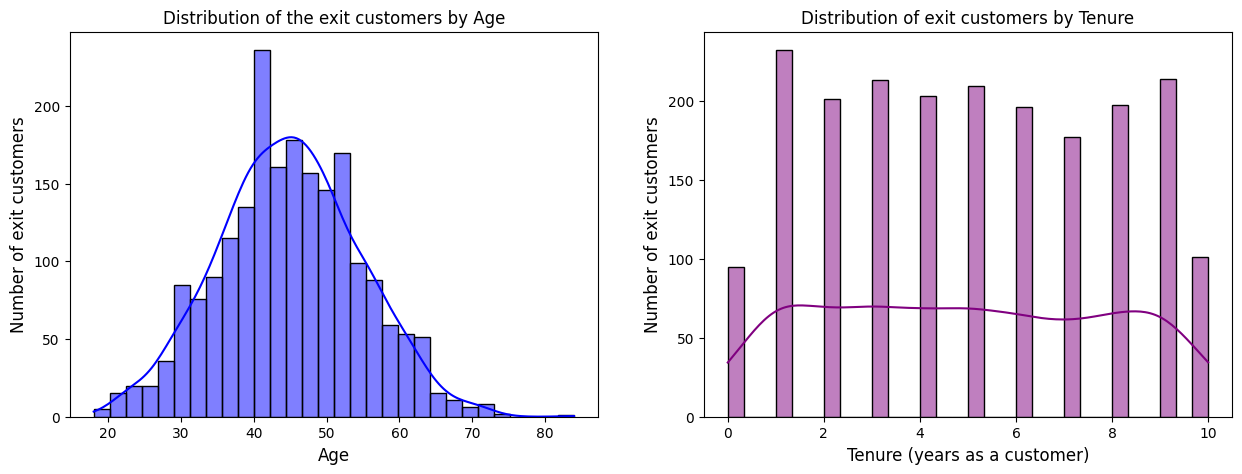

In [54]:
# plotting the distribution of exit customer by Age and Tenure
plt.figure(figsize = (15, 5))

# plot distribution of customer exit by Age
plt.subplot(1, 2 ,1)
sns.histplot(churned_df["Age"], bins = 30, kde = True, color = "blue")

plt.title("Distribution of the exit customers by Age")
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Number of exit customers", fontsize = 12)

#-----------------------------------------------

# plot distribution of customer exit by Tenure
plt.subplot(1, 2, 2)
sns.histplot(churned_df["Tenure"], bins = 30, kde = True, color = "purple")

plt.title("Distribution of exit customers by Tenure")
plt.xlabel("Tenure (years as a customer)", fontsize = 12)
plt.ylabel("Number of exit customers", fontsize = 12)
plt.show()

#### <ins>**customer churn by Age**</ins>
- mostly exit customers are between <strong> 35 and 55 </strong>years old.
- younger (< 30) and older (> 60) customers exit less.

<ins> Possible reasons: </ins> middle-aged customers may be looking for better conditions.

#### <ins>**customer churn by Tenure**</ins>
- fluctuations with peaks at <strong>1, 2, 3, 5, 7, 9 </strong> years.
- the curve does not show a clear tendency, meaning that there is not just one specific group of customers with high churn.

<ins> Possible reasons: </ins> Churn could be influenced by contractual terms or marketing strategies.

## <ins> Identify Outliers</ins>

In [55]:
# function to plot boxplot
def plot_boxplot(column):
    plt.figure(figsize =  (10, 5))
    
    sns.boxplot(x = df[column])
    plt.title(f"Boxplot for {column}", fontsize = 20)
    plt.grid(True, linestyle = "-")
    plt.show()

In [56]:
# function to identify outliers with the interquartile range (iqr)
def detect_outliers_iqr(column):
    # define the boundaries
    q1  = np.percentile(df[column], 25) 
    q3  = np.percentile(df[column], 75)
    
    # calculate iqr
    iqr = q3 - q1
    
    # calculating the limits for outliers
    # Note: factor 1.5 is a constant used as a threshold
    # Increasing the constant: fewer outliers will be identified
    # Decreasing the constant: more outliers will be considered unusual
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # identification of the outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [57]:
# function to display the outliers
def display_outliers(df):
    outliers_dict = {}

    for col in df.columns: 
        outliers = detect_outliers_iqr(col) 
        
        if not outliers.empty: 
            outliers_dict[col] = outliers
    
        outliers_count = len(outliers)
        perc           = (outliers_count * 100.0) / len(df)
        print(f"{col} = {perc:.2f}% ({outliers_count} out of {len(df)})")   

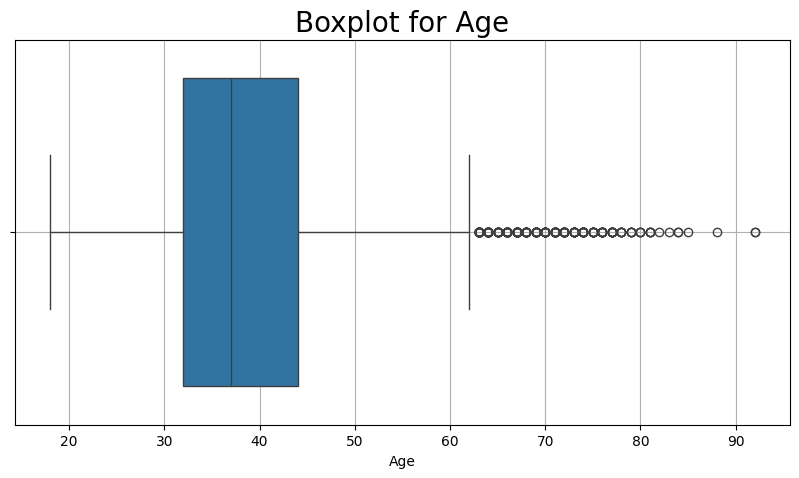

In [58]:
plot_boxplot("Age")

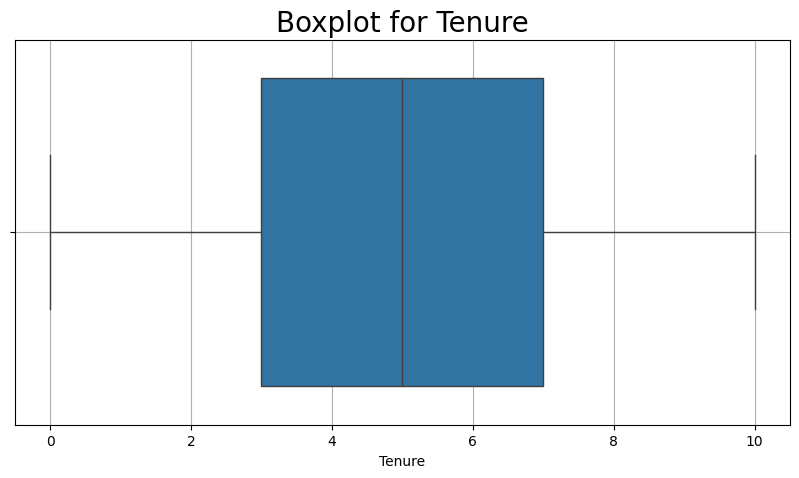

In [59]:
plot_boxplot("Tenure")

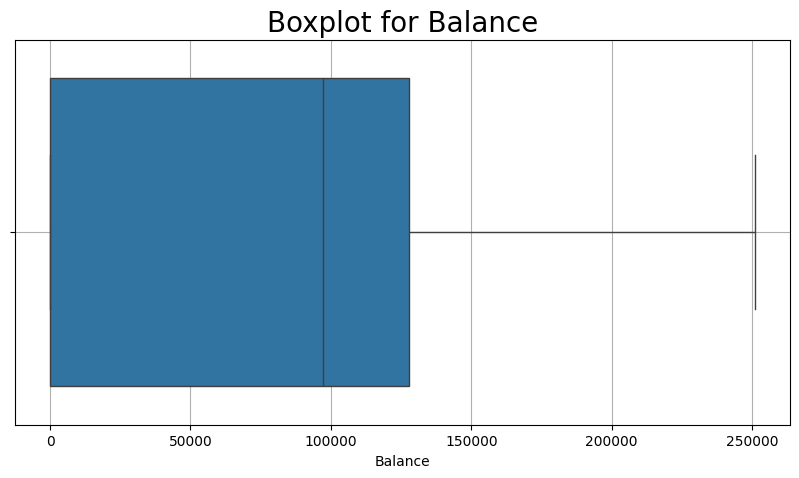

In [60]:
plot_boxplot("Balance")

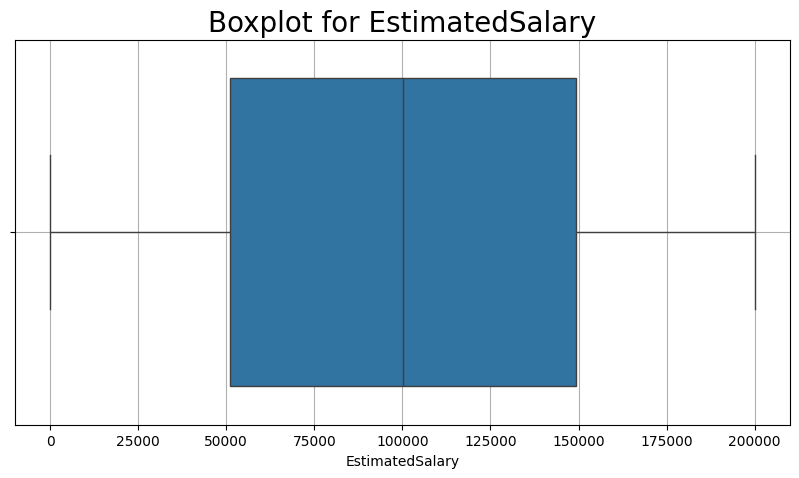

In [61]:
plot_boxplot("EstimatedSalary")

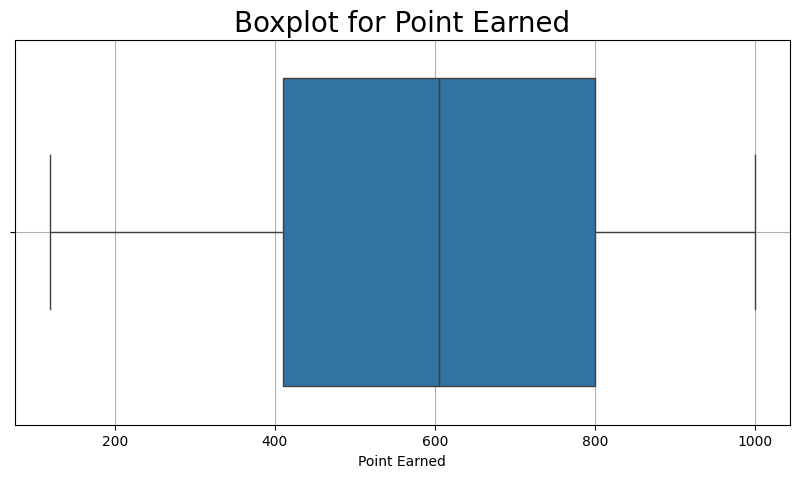

In [62]:
plot_boxplot("Point Earned")

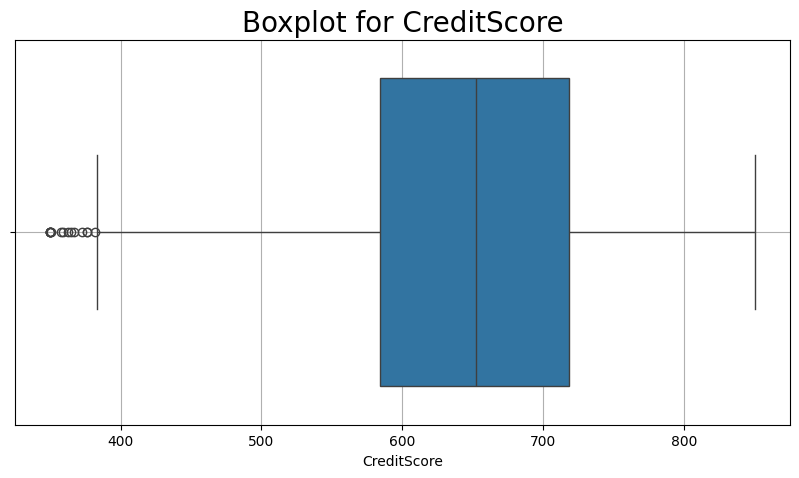

In [63]:
plot_boxplot("CreditScore")

In [64]:
# display only numerical features for outliers
# features that excluded: binary, categorical columns
column_outliers = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Satisfaction Score", "Point Earned"]

print("---Outliers---")
display_outliers(df[column_outliers])

---Outliers---
CreditScore = 0.15% (15 out of 10000)
Age = 3.59% (359 out of 10000)
Tenure = 0.00% (0 out of 10000)
Balance = 0.00% (0 out of 10000)
EstimatedSalary = 0.00% (0 out of 10000)
Satisfaction Score = 0.00% (0 out of 10000)
Point Earned = 0.00% (0 out of 10000)


There are some outliers in `Age` and `CreditScore`.

Since the number of outliers is very small, the outliers are not removed from the DataFrame.

## <ins> Model Building </ins>

In this section there will be an analysis of several classification models:
- `Logistic Regression`
- `Random Forest`
- `SVM`
- `Gradient Boosting`
- `XGBoost`

### <ins>Feature selection</ins>

In [65]:
# define features and target
X = df.drop(["Exited"], axis = 1)
y = df["Exited"]

In [66]:
# divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# scale the data
sc             = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

In [67]:
# function for model evaluation
def calculate_metrics(y_test, y_pred):
    metrics = {
        "accuracy" : accuracy_score (y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall"   : recall_score   (y_test, y_pred),
        "F1-Score" : f1_score       (y_test, y_pred)
    }
    return metrics

In [68]:
# define Models
models = {
    "Logistic Regression": LogisticRegression(random_state = 1),
    "Random Forest":       RandomForestClassifier(random_state = 1),
    "SVM":                 SVC(random_state = 1),
    "Gradient Boosting":   GradientBoostingClassifier(random_state = 1),
    "XG-Boost":            XGBClassifier(random_state = 1)
}

In [69]:
all_metrics = {}

# iterate through all models and save metrics
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred            = model.predict(X_test_scaled)
    all_metrics[name] = calculate_metrics(y_test, y_pred)
    metrics_df        = pd.DataFrame.from_dict(all_metrics, orient = 'index')

In [70]:
metrics_df

,accuracy,precision,recall,F1-Score
Logistic Regression,0.8100,0.617450,0.221687,0.326241
Random Forest,0.8635,0.803419,0.453012,0.579353
SVM,0.8610,0.878453,0.383133,0.533557
Gradient Boosting,0.8620,0.779116,0.467470,0.584337
XG-Boost,0.8545,0.718310,0.491566,0.583691


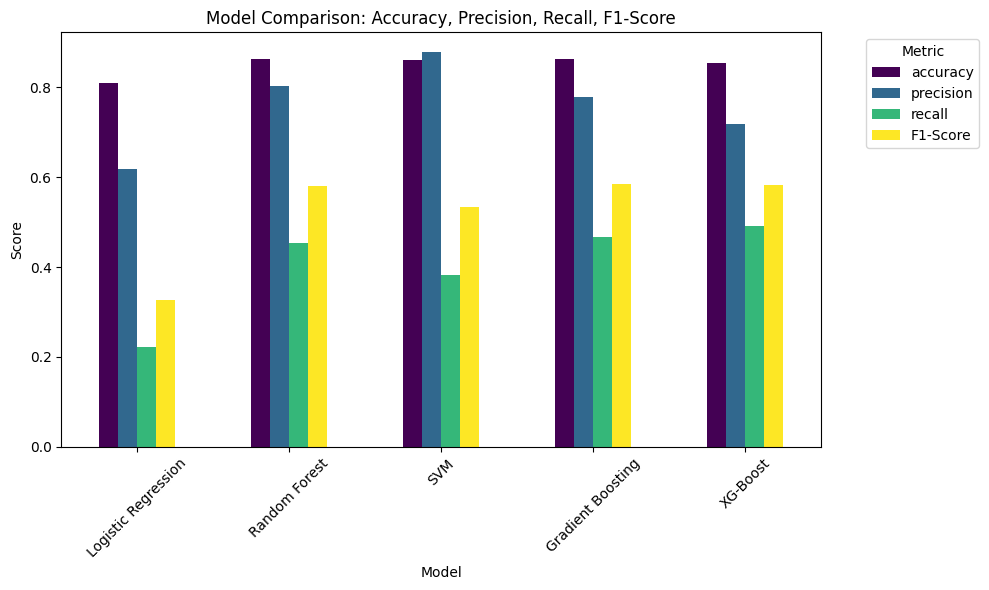

In [71]:
# visualization for metrics comparision
metrics_df.plot(kind = 'bar', figsize = (10, 6), colormap = "viridis")

plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation = 45)
plt.legend(title = "Metric", bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

- To predict customer churn in bank, we should select models that pay particular attention to the recall value, as this indicates how well the model can identify churning customers (class 1).

- Since the costs of losing a customer are high, it is crucial to identify as many customers as possible early on, so a model with good `recall` and `F1-Score` is more advantageous.

<strong><ins> Models: </ins></strong>
- <strong>Logistic Regression</strong> has the worst recall and F1-score.

- <strong>Random Forest</strong> has the highest accuracy and very good precision, but the recall could still be optimized.

- <strong>Gradient Boosting</strong> offers a good combination of accuracy, precision, recall and F1-Score.

- <strong>XGBoost</strong> is close and could perhaps perform better with hyperparameter tuning.

In the following there will be an hyperparameter optimazation for `Random Forest`, `Gradient Boosting` and `XGBoost`.

## <ins>Hyperparameter optimazation</ins>

### <ins>Define Functions</ins>

In [72]:
# function for plotting the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm         = confusion_matrix(y_test, y_pred)
    ticklabels = ['Stayed', 'Exited']
    
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ticklabels, yticklabels = ticklabels)
    plt.title(f"Confusionmatrix for {title}")
    plt.xlabel('Predicted Values')
    plt.ylabel("Actual Values")

In [73]:
# function to compare two models with confusion matrix
def compare_confusion_matrices(y_test1, y_pred1, title1, y_test2, y_pred2, title2):
    plt.figure(figsize = (14, 5))
    
    # first model
    plt.subplot(1, 2, 1)
    plot_confusion_matrix(y_test1, y_pred1, title1)
    
    # second model
    plt.subplot(1, 2, 2)
    plot_confusion_matrix(y_test2, y_pred2, title2)
    
    plt.tight_layout()
    plt.show()

In [74]:
# function to display the calculated metrics
def display_metrics(y_test, y_pred):
    metrics = calculate_metrics(y_test, y_pred)
    
    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")

In [75]:
# function to find the best hyperparameter with GridSearchCV
def grid_search_tuning(model, param_grid):
    gs = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1) # n_jobs = -1: use all CPUs to calculate faster
    gs.fit(X_train_scaled, y_train)
   
    # display best hyperparameter with accuracy score
    print("Best set of Hyperparameters: ", gs.best_params_)
    
    # display metrics of best model
    best_model  = gs.best_estimator_
    y_pred_best = best_model.predict(X_test_scaled)
    
    print("\nMetrics of best Model:")
    display_metrics(y_test, y_pred_best)

### <ins>Random Forest Optimazation</ins>

- `n_estimators`: The number of trees.
    - Higher values can improve performance but may lead to overfitting.
- `max_depth`: The maximum depth of each tree.
    - Higher values lead to more complex models (better for non-linear relationships).
    - Lower values prevent overfitting and make the model more robust.
- `min_samples_leaf`: The minimum number of samples required to be in a leaf node.
    - Higher values prevent overfitting by ensuring that leaf nodes have enough data.
    - Lower values allow the model to capture more patterns but may lead to overfitting.
- `min_samples_split`: The minimum number of samples required to split an internal node.
    - Higher values make the model more conservative by requiring larger splits.
    - Lower values allow deeper trees, which may improve performance but increase overfitting risk.   


In [76]:
# Hyperparameter tuning for Random Forest
# define Parameter grid
param_grid_rf = {
    "n_estimators":      [100, 150, 200, 300],
    "max_depth":         [10, 20, 30],
    "min_samples_leaf":  [1, 2, 4],
    "min_samples_split": [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state = 1)
print("---Random-Forest Hyperparameter tuning---")
grid_search_tuning(rf_model, param_grid_rf)

---Random-Forest Hyperparameter tuning---
Best set of Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Metrics of best Model:
accuracy: 0.8690
precision: 0.8430
recall: 0.4530
F1-Score: 0.5893


In [77]:
# creating the Random Forest model with best Hyperparameters
model_rf = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 5, min_samples_leaf = 2, random_state = 1)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [78]:
display_metrics(y_test, y_pred_rf)

accuracy: 0.8690
precision: 0.8430
recall: 0.4530
F1-Score: 0.5893


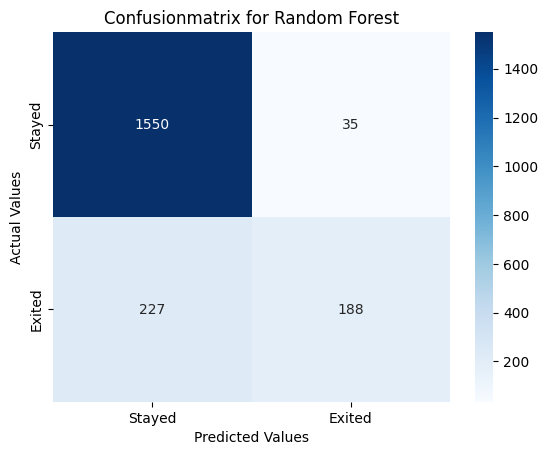

In [79]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

### <ins>Gradient-Boosting Optimazation</ins>
In <strong>Gradient Boosting</strong>, several important parameters influence the model's behavior:
- `n_estimators`: The number of trees.
    - Higher values can improve performance but may lead to overfitting.
- `learning_rate`: Controls how much each tree contributes to the model.
    - Low values require more trees but help prevent overfitting.
    - Higher values speed up learning but can be unstable.
- `max_depth`: The maximum depth of each tree.
    - Higher values lead to more complex models (better for non-linear relationships).
    - Lower values prevent overfitting and make the model more robust.

In [80]:
# Hyperparameter tuning for Gradient-Boosting
# define Parameter grid
param_grid_gb = {
    "n_estimators":  [100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "max_depth":     [3, 5, 7]
}

gb_model = GradientBoostingClassifier(random_state = 1)
print("---Gradient-Boosting Hyperparameter tuning---")
grid_search_tuning(gb_model, param_grid_gb)

---Gradient-Boosting Hyperparameter tuning---
Best set of Hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

Metrics of best Model:
accuracy: 0.8665
precision: 0.7960
recall: 0.4795
F1-Score: 0.5985


In [81]:
# creating the Gradient-Boosting model with best Hyperparameters
model_gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.05, random_state = 1)
model_gb.fit(X_train_scaled, y_train)

y_pred_gb = model_gb.predict(X_test_scaled)

In [82]:
display_metrics(y_test, y_pred_gb)

accuracy: 0.8665
precision: 0.7960
recall: 0.4795
F1-Score: 0.5985


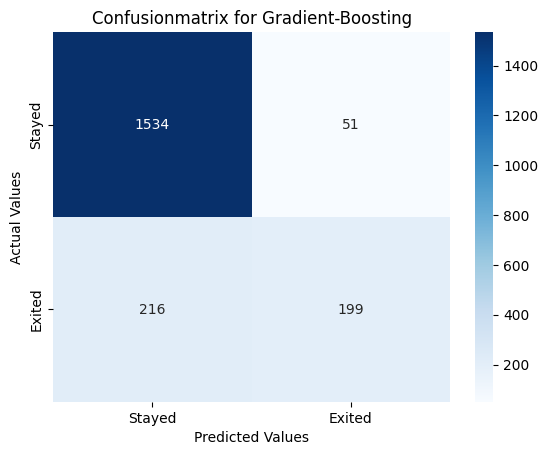

In [83]:
plot_confusion_matrix(y_test, y_pred_gb, "Gradient-Boosting")

### <ins>XGBoost Optimazation</ins>
In <strong>XGBoost</strong>, several important hyperparameters control the model’s performance and regularization:
- `n_estimators`: The number of trees.  
  - More estimators can improve accuracy but may lead to overfitting.  
- `learning_rate`: Determines how much each tree contributes to the final model.  
  - Lower values make learning more stable but require more trees.  
  - Higher values speed up training but may cause overfitting.  
- `min_child_weight`: The minimum sum of instance weights needed in a leaf node.  
  - Higher values make the model more conservative (prevents small, noisy splits).  
  - Lower values allow deeper trees but may lead to overfitting. 
- `subsample`: The fraction of training samples used for each boosting round.  
  - Values < 1.0 help prevent overfitting by adding randomness.  
  - Typical values range from 0.5 to 1.0.  
- `reg_alpha` (L1 Regularization): Adds a penalty on large feature weights.  
  - Helps reduce complexity and makes the model more robust to noise.  
  - Higher values encourage sparsity in features (useful for high-dimensional data). 


In [84]:
# Hyperparameter tuning for XGBoost
# Parameter grid for XGBoost
param_grid_xgb = {
    "n_estimators":     [100, 150, 200],
    "learning_rate":    [0.01, 0.05, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5],
    "subsample":        [0.6, 0.8, 1.0],
    "reg_alpha":        [0, 0.1, 1]
}

xgb_model = XGBClassifier(random_state = 1)
print("---XGBoost Hyperparameter tuning---")
grid_search_tuning(xgb_model, param_grid_xgb)

---XGBoost Hyperparameter tuning---
Best set of Hyperparameters:  {'learning_rate': 0.05, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'subsample': 0.8}

Metrics of best Model:
accuracy: 0.8650
precision: 0.7959
recall: 0.4699
F1-Score: 0.5909


In [85]:
# creating the XGBoost model with best Hyperparameters
model_xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.05, min_child_weight = 1, reg_alpha = 0.1, subsample = 0.8, random_state = 1)
model_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = model_xgb.predict(X_test_scaled)

In [86]:
display_metrics(y_test, y_pred_xgb)

accuracy: 0.8650
precision: 0.7959
recall: 0.4699
F1-Score: 0.5909


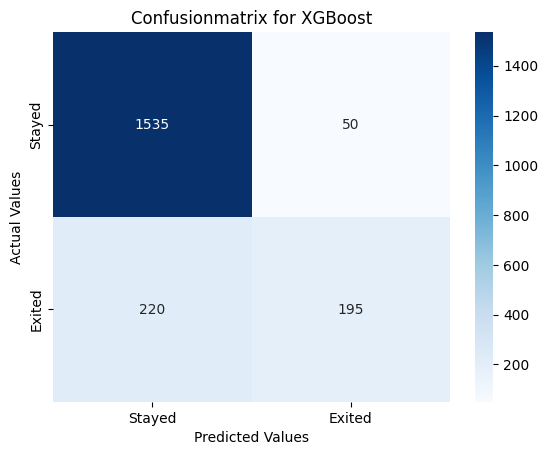

In [87]:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

## <ins>Comparison of Confusion Matrices</ins>

### <ins>`Random Forest` vs. `Gradient-Boosting`</ins>

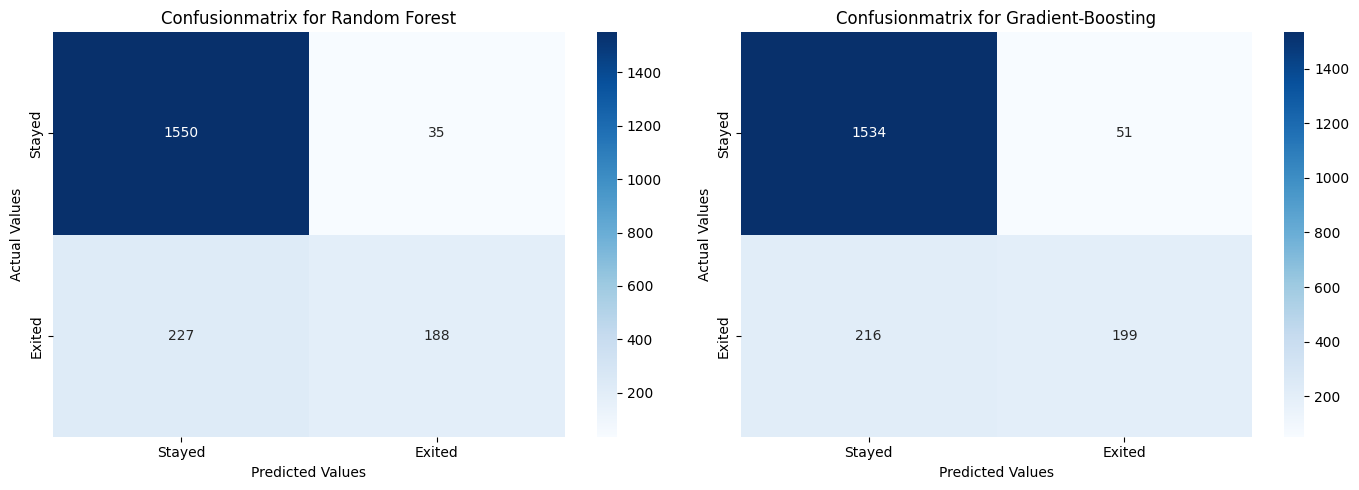

In [88]:
compare_confusion_matrices(y_test, y_pred_rf, "Random Forest", y_test, y_pred_gb, "Gradient-Boosting")

### <ins> `Random Forest` vs. `XGBoost`</ins>

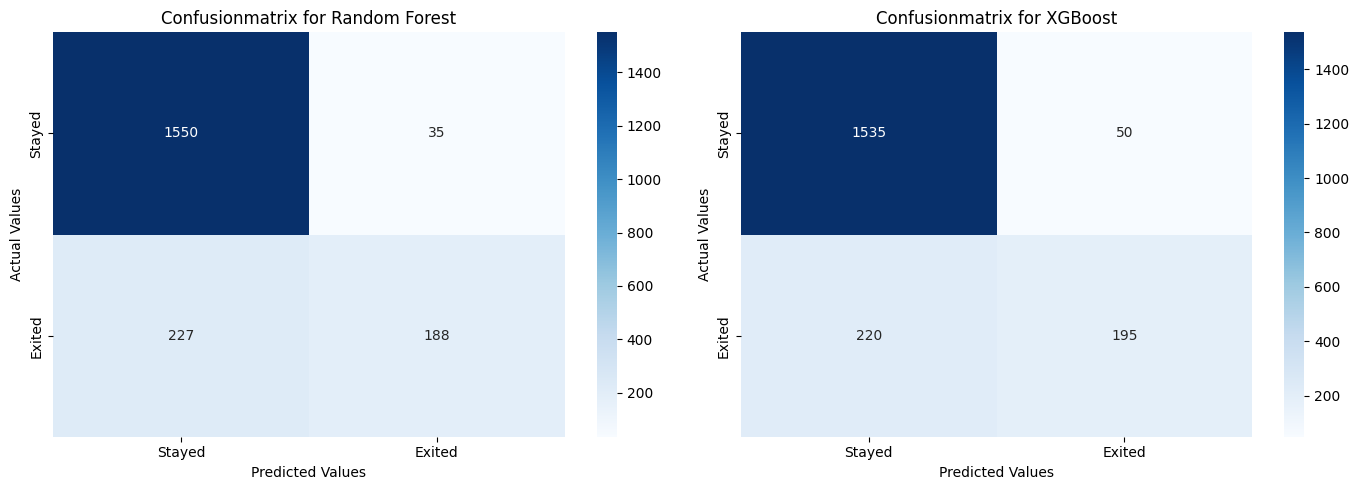

In [89]:
compare_confusion_matrices(y_test, y_pred_rf, "Random Forest",y_test, y_pred_xgb, "XGBoost")

### <ins> `Gradient-Boosting` vs. `XGBoost`</ins>

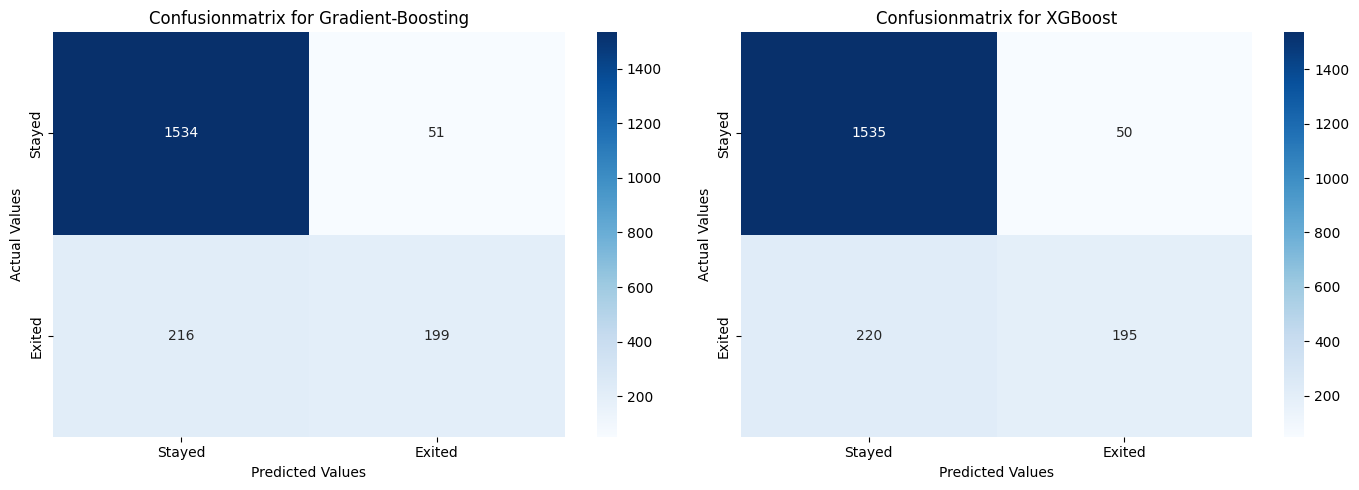

In [90]:
compare_confusion_matrices(y_test, y_pred_gb, "Gradient-Boosting", y_test, y_pred_xgb, "XGBoost")

Based on the confusion matrices, the models can be compared as follows:

<ins>**Model Comparision**</ins>
- Random Forest:
    - High accuracy for stayed customers (1550)
    - 188 exited customers correctly predicted, but 227 misclassified

- Gradient Boosting:
    - 1534 stayed customers correctly predicted (slightly worse than Random Forest)
    - More exited customers correctly identified (199, fewer than Random Forest)
- XGBoost:
    - Almost similar to Gradient Boosting but slightly better at identifying exited customers (195, 220)

<ins>**Best Model**</ins>

Gradient Boosting and XGBoost performs better than Random Forest. XGBoost shows slightly better result than Gradient Boosting, making it the better choice overall. 

Next, the models are optimazed more precisely to achieve better results.

## <ins>Threshold optimazation</ins>

In [91]:
# function to calculate the best precision, recall and f1-score dedpending on the threshold
def find_optimal_threshold_and_metrics(model, X_test):
    # extract only the probabilities for the "Exited" class (=1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # test thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    
    # optimal threshold for best f1-score
    optimal_index     = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_index]
    
    # prediction with best threshold
    y_pred_opt = (y_pred_prob >= optimal_threshold).astype(int)
    
    return precisions, recalls, f1_scores, thresholds, optimal_threshold, y_pred_opt

In [92]:
# function to visualize the optimal threshold
def plot_optimal_threshold(precisions, recalls, f1_scores, thresholds, optimal_threshold, title):
    plt.figure(figsize = (10, 6))
    
    plt.plot(thresholds, precisions[:-1], label = "Precision", linestyle = '--')
    plt.plot(thresholds, recalls[:-1], label = "Recall", linestyle = '--')
    plt.plot(thresholds, f1_scores[:-1], label = "F1-Score", linewidth =2 )
    
    plt.axvline(optimal_threshold, color = 'red', linestyle = 'dotted', label = f'Optimal Threshold: {optimal_threshold:.3f}')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision, Recall and F1-Score depending on the threshold for {title}")
    plt.legend()
    plt.show()

### <ins>Random Forest with best Threshold</ins>

In [93]:
precision_rf, recalls_rf, f1_scores_rf, thresholds_rf, optimal_threshold_rf, y_pred_opt_rf = find_optimal_threshold_and_metrics(model_rf, X_test_scaled)

# display optimal threshold and metrics
print(f"Optimal Threshold for Random Forest:", optimal_threshold_rf)
print("\n---Metrics for best Threshold---")
display_metrics(y_test, y_pred_opt_rf)

Optimal Threshold for Random Forest: 0.28670247345247357

---Metrics for best Threshold---
accuracy: 0.8475
precision: 0.6165
recall: 0.7012
F1-Score: 0.6561


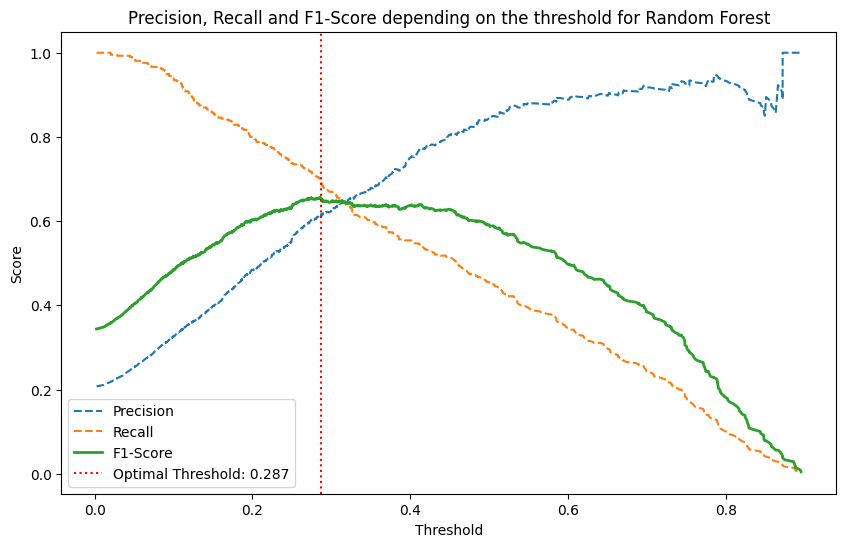

In [94]:
# Visualization of thresold impacts
plot_optimal_threshold(precision_rf, recalls_rf, f1_scores_rf, thresholds_rf, optimal_threshold_rf, "Random Forest")

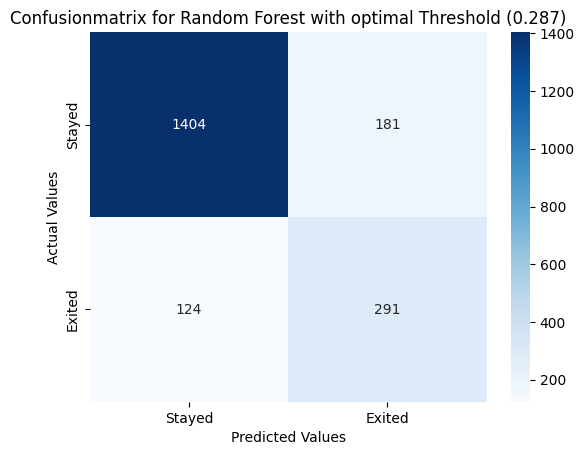

In [95]:
plot_confusion_matrix(y_test, y_pred_opt_rf, f"Random Forest with optimal Threshold ({optimal_threshold_rf:.3f})")

### <ins>Comparison of Confusion Matrices for Random Forest: `Standard` vs. `Optimized Threshold`</ins>

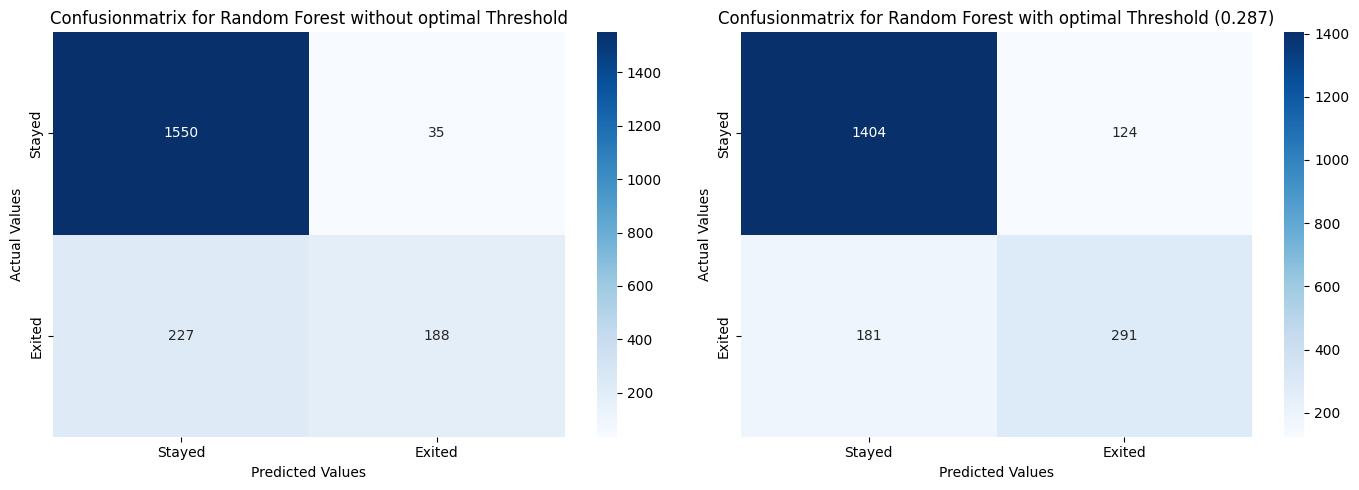

In [96]:
compare_confusion_matrices(
    y_test, y_pred_rf, "Random Forest without optimal Threshold", y_pred_opt_rf, 
    y_test, f"Random Forest with optimal Threshold ({optimal_threshold_rf:.3f})"
)

### <ins>Gradient-Boosting with best Threshold</ins>

In [97]:
precisions_gb, recalls_gb, f1_scores_gb, thresholds_gb, optimal_threshold_gb, y_pred_opt_gb = find_optimal_threshold_and_metrics(model_gb, X_test_scaled)

# display optimal threshold and metrics
print(f"Optimal Threshold for Gradient-Boosting: ", optimal_threshold_gb)
print("\n---Metrics for best Threshold---")
display_metrics(y_test, y_pred_opt_gb)

Optimal Threshold for Gradient-Boosting:  0.2707582458267752

---Metrics for best Threshold---
accuracy: 0.8460
precision: 0.6181
recall: 0.6747
F1-Score: 0.6452


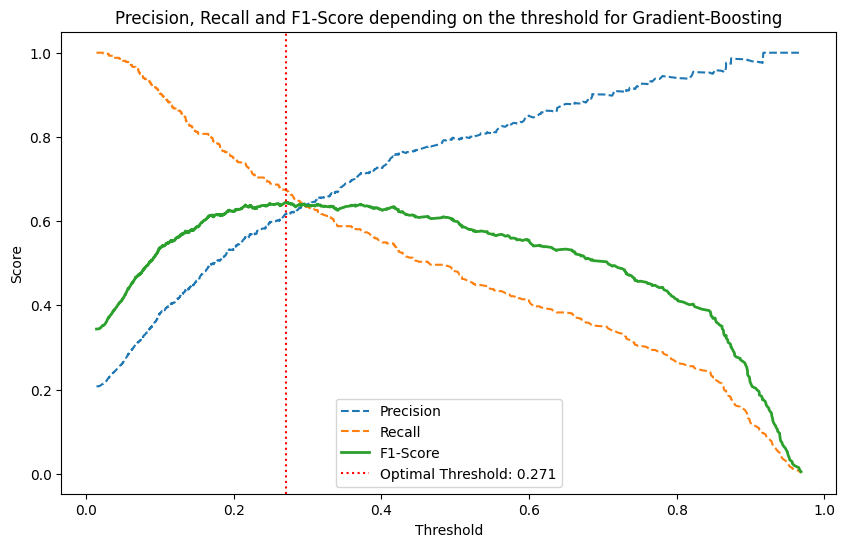

In [98]:
# Visualization of threshold impacts
plot_optimal_threshold(precisions_gb, recalls_gb, f1_scores_gb, thresholds_gb, optimal_threshold_gb, "Gradient-Boosting")

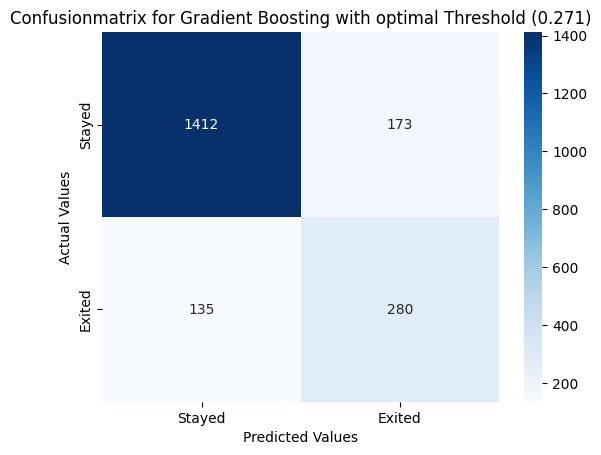

In [99]:
plot_confusion_matrix(y_test, y_pred_opt_gb, f"Gradient Boosting with optimal Threshold ({optimal_threshold_gb:.3f})")

### <ins>Comparison of Confusion Matrices for Gradient Boosting: `Standard` vs. `Optimized Threshold`</ins>

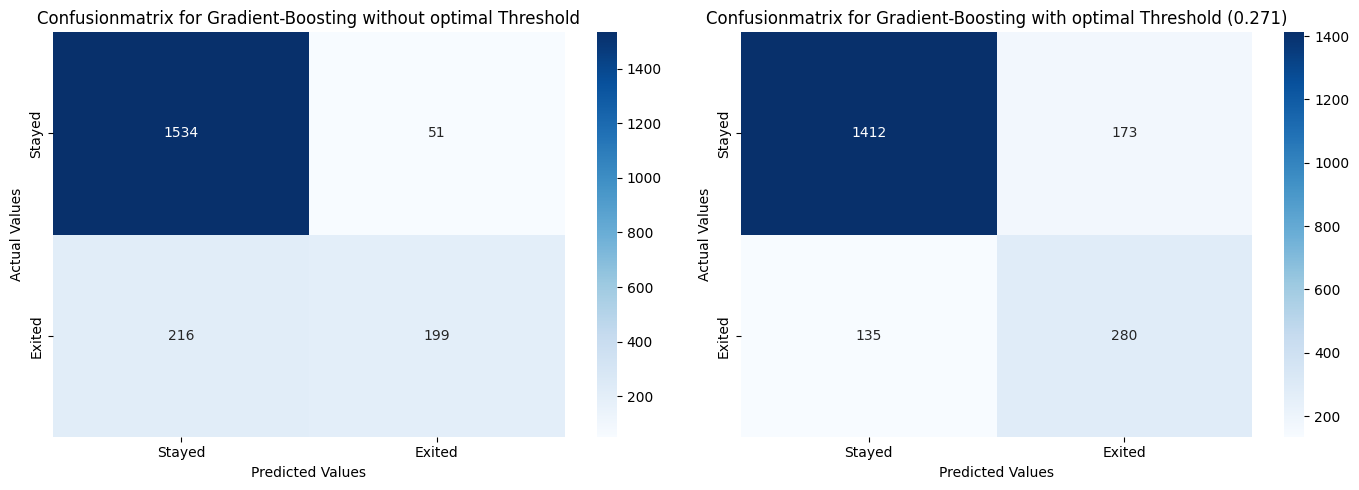

In [100]:
compare_confusion_matrices(
    y_test, y_pred_gb, "Gradient-Boosting without optimal Threshold", 
    y_test, y_pred_opt_gb, f"Gradient-Boosting with optimal Threshold ({optimal_threshold_gb:.3f})"
)

### <ins>XG-Boost with best Threshold</ins>

In [101]:
precisions_xgb, recalls_xgb, f1_scores_xgb, thresholds_xgb, optimal_threshold_xgb, y_pred_opt_xgb = find_optimal_threshold_and_metrics(model_xgb, X_test_scaled)

# display optimal threshold and metrics
print(f"Optimal Threshold for XGBoost: ", optimal_threshold_xgb)
print("\n---Metrics for best Threshold---")
display_metrics(y_test, y_pred_opt_xgb)

Optimal Threshold for XGBoost:  0.29995853

---Metrics for best Threshold---
accuracy: 0.8550
precision: 0.6485
recall: 0.6578
F1-Score: 0.6531


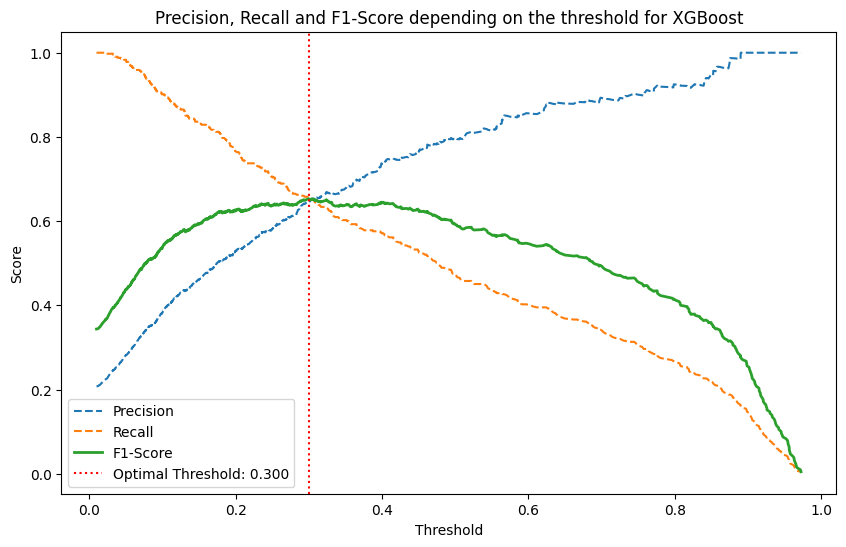

In [102]:
# Visualization of threshold impacts
plot_optimal_threshold(precisions_xgb, recalls_xgb, f1_scores_xgb, thresholds_xgb, optimal_threshold_xgb, "XGBoost")

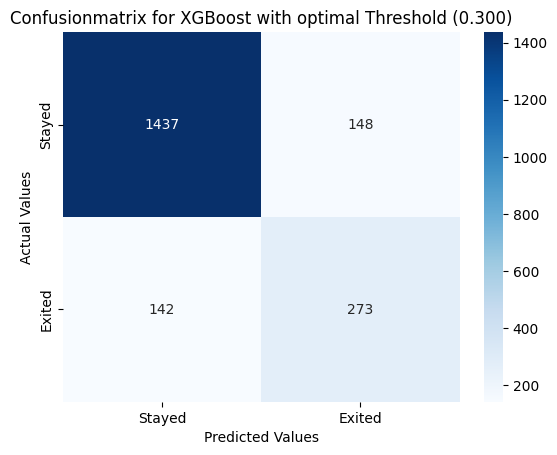

In [103]:
plot_confusion_matrix(y_test, y_pred_opt_xgb, f"XGBoost with optimal Threshold ({optimal_threshold_xgb:.3f})")

### <ins>Comparison of Confusion Matrices for XGBoost: `Standard` vs. `Optimized Threshold`</ins>

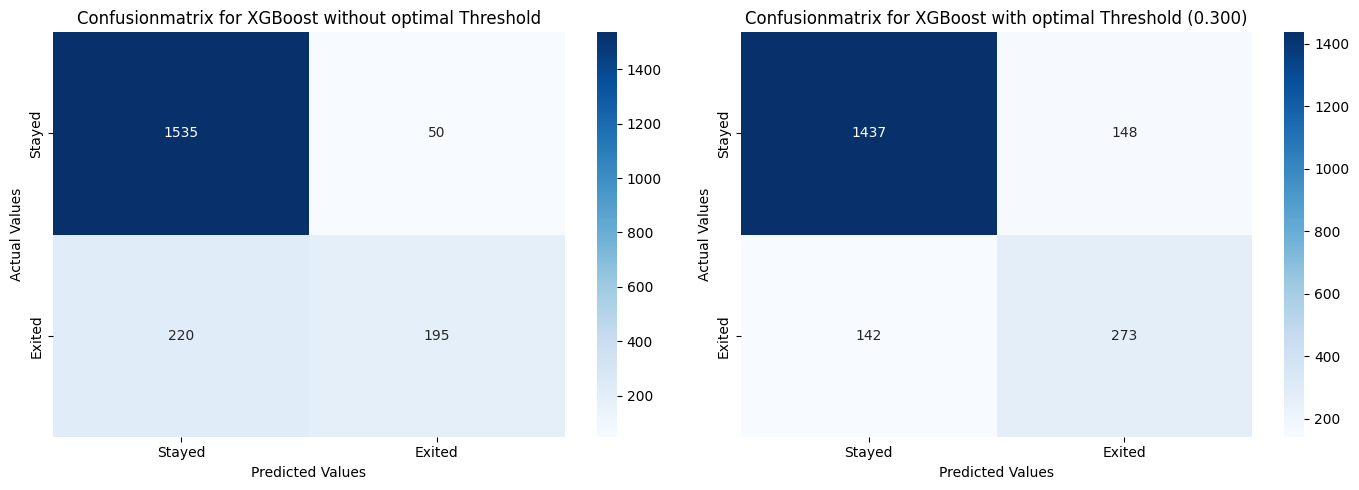

In [104]:
compare_confusion_matrices(
    y_test, y_pred_xgb, "XGBoost without optimal Threshold", 
    y_test, y_pred_opt_xgb, f"XGBoost with optimal Threshold ({optimal_threshold_xgb:.3f})"
    )

<ins>**Observation:**</ins>

With threshold optimization, all models improve at identifying churned customers, but the number of falsely classified loyal customers increased.

## <ins>Comparision of Matrices after Threshold Optimazation</ins>

### <ins>`Random Forest` vs. `Gradient-Boosting`</ins>

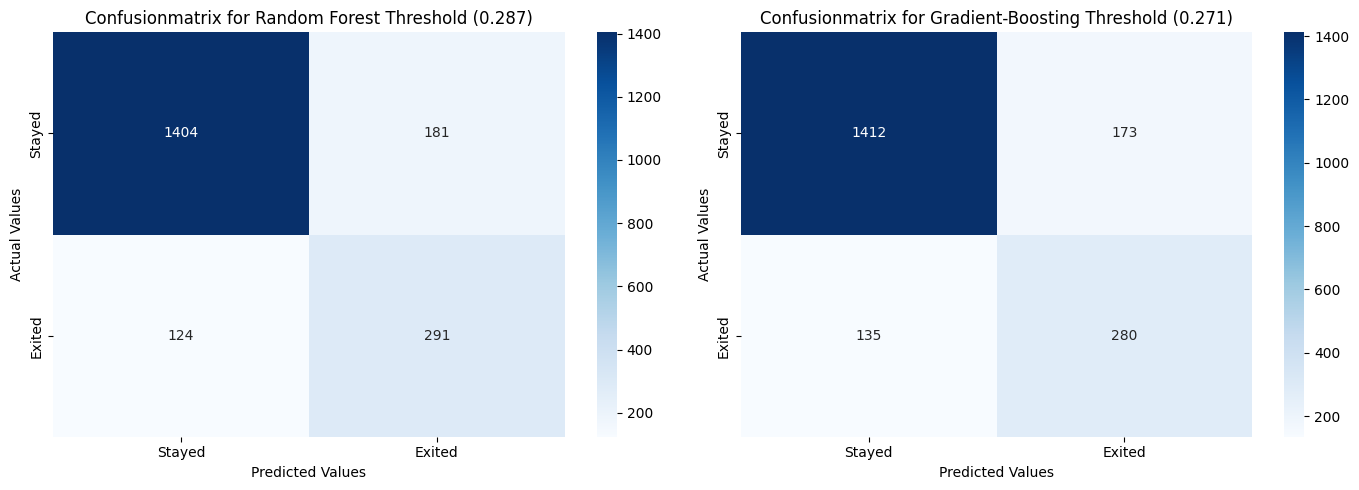

In [105]:
compare_confusion_matrices(
    y_test, y_pred_opt_rf, f"Random Forest Threshold ({optimal_threshold_rf:.3f})", 
    y_test, y_pred_opt_gb, f"Gradient-Boosting Threshold ({optimal_threshold_gb:.3f})"
)

### <ins>`Random Forest` vs. `XGBoost`</ins>

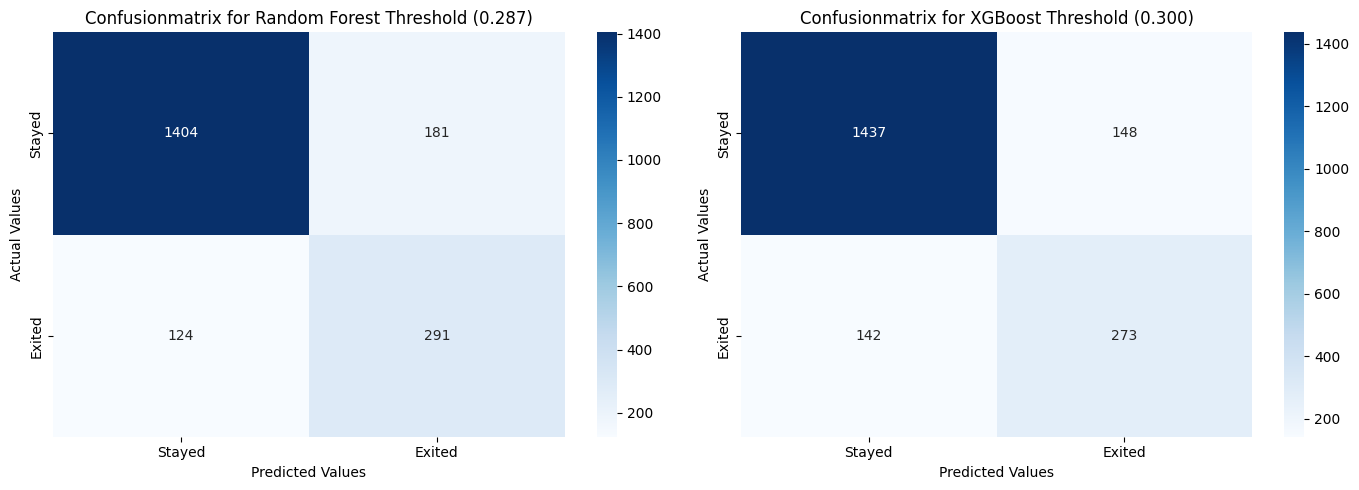

In [106]:
compare_confusion_matrices(
    y_test, y_pred_opt_rf, f"Random Forest Threshold ({optimal_threshold_rf:.3f})", 
    y_test, y_pred_opt_xgb, f"XGBoost Threshold ({optimal_threshold_xgb:.3f})"
)

### <ins>`Gradient-Boosting` vs. `XGBoost`</ins>

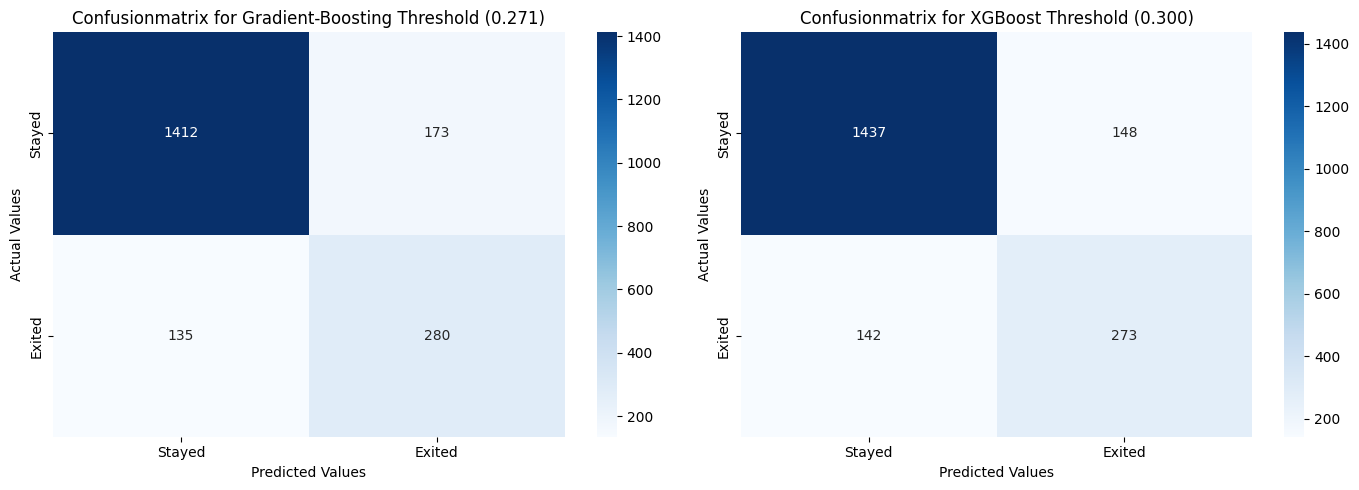

In [107]:
compare_confusion_matrices(
    y_test, y_pred_opt_gb, f"Gradient-Boosting Threshold ({optimal_threshold_gb:.3f})", 
    y_test, y_pred_opt_xgb, f"XGBoost Threshold ({optimal_threshold_xgb:.3f})"
)

### <ins>Comparison of Model Metrics using the Optimal Threshold: `Gradient-Boosting` vs. `XGBoost`</ins>

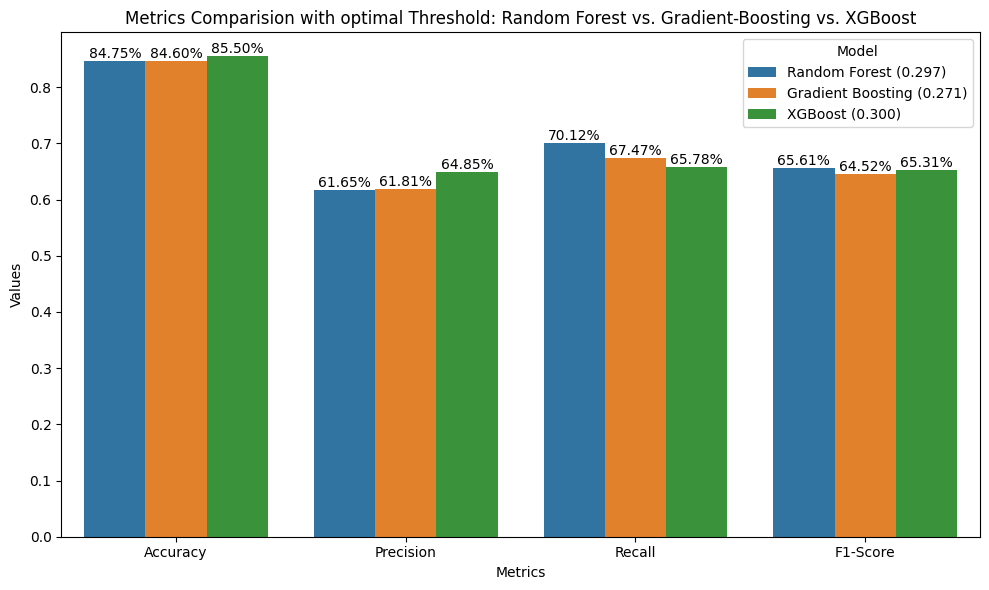

In [108]:
# plotting comparision of two models by metrics 
# metrics for both models with optimal Threshold
metrics_rf  = calculate_metrics(y_test, y_pred_opt_rf)
metrics_gb  = calculate_metrics(y_test, y_pred_opt_gb)
metrics_xgb = calculate_metrics(y_test, y_pred_opt_xgb)

# dataframe of metrics
metrics_df = pd.DataFrame({
    'Metric'                   : ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest (0.297)'    : [metrics_rf['accuracy'],  metrics_rf['precision'],  metrics_rf['recall'],  metrics_rf['F1-Score']],
    'Gradient Boosting (0.271)': [metrics_gb['accuracy'],  metrics_gb['precision'],  metrics_gb['recall'],  metrics_gb['F1-Score']],
    'XGBoost (0.300)'          : [metrics_xgb['accuracy'], metrics_xgb['precision'], metrics_xgb['recall'], metrics_xgb['F1-Score']]
})

# convert DataFrame to Long Format
metrics_long_df = metrics_df.melt(id_vars = ['Metric'], var_name = 'Model', value_name = 'Value')

# visualization
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Metric', y = 'Value', hue = 'Model', data = metrics_long_df)

# Add percentage labels to bars
for p in ax.patches:
    if p.get_height() > 0: # only values > 0 are displayed
        ax.annotate(f"{p.get_height():.2%}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title("Metrics Comparision with optimal Threshold: Random Forest vs. Gradient-Boosting vs. XGBoost")
plt.xlabel("Metrics")
plt.ylabel("Values")

plt.tight_layout()
plt.show()

<ins> Oberservations</ins>:
- **Accuracy:** all three models show similar accuracy, with XGBoost slightly outperforming the others.
- **Precision:** XGBoost has the highest precision.
- **Recall:** Random Forest performs best in recall, meaning it captures more actual churned customers.
- **F1-Score:** all models have comparable F1-Scores, balancing precision and recall.

<ins> Which Model to Choose for Customer Churn Prediction?</ins>
- If the bank wants to **focus on reducing false alarms (high precision)** to avoid incorrectly identifying loyal customers as churn risks, **XGBoost** is the best choice.
- If the goal is to **identify as many actual churners as possible (high recall)** to take proactive retention actions, **Random Forest** would be a better option.
- Since customer churn prediction typically benefits from **high recall** (to prevent losing actual churners) while maintaining a reasonable precision, **Random Forest is likely the best choice** in this scenario.


<ins>Conclusion:</ins>
For customer churn prediction in banks, **Random Forest is recommended** due to its higher recall, ensuring that more potential churners are identified and allowing the bank to take proactive measures to retain them, as the cost of loosing a customer is higher than acquiring new ones.

In the next step, the most important features for each model are examined.

## <ins>Feature-Importance</ins>

analyzing the best features for each model.

In [109]:
# function to plot the important features of a model
def plot_feature_importance(model):
    importances   = model.feature_importances_ 
    feature_names = X.columns
    
    feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})     # create DataFrame with important features
    feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending = False) # sort features
    
    # plot visualization
    plt.figure(figsize = (10, 6))
    sns.barplot(x = "Importance", y = "Feature", data = feature_importance_df)
    plt.title(f"Feature Importance ({model.__class__.__name__})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

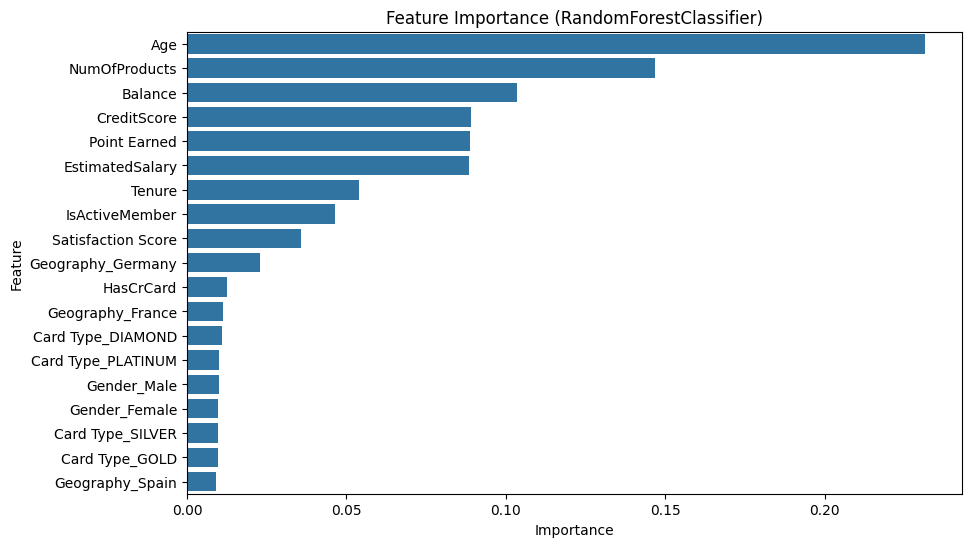

In [110]:
plot_feature_importance(model_rf)

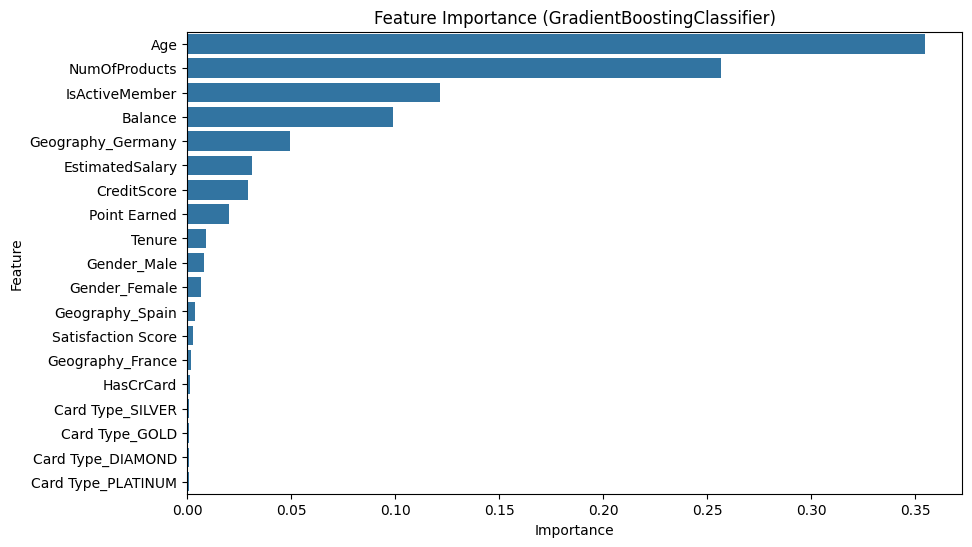

In [111]:
plot_feature_importance(model_gb)

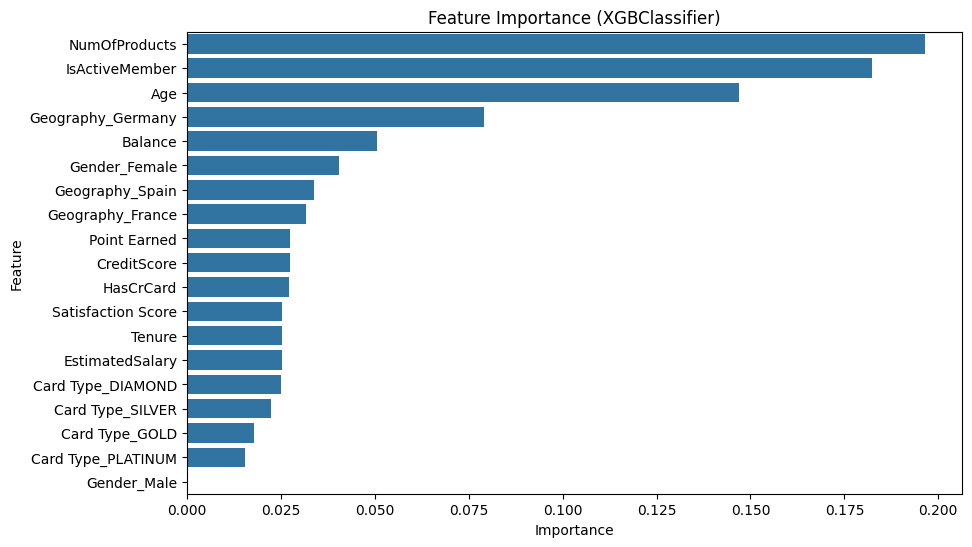

In [112]:
plot_feature_importance(model_xgb)

## <ins>Removing Features step by step from Random Forest</ins>

In [113]:
def train_model(X, y):
    X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    scaler = StandardScaler()
    X_train_scaled_fr = scaler.fit_transform(X_train_fr)
    X_test_scaled_fr  = scaler.transform(X_test_fr)
    
    return X_train_scaled_fr, X_test_scaled_fr, y_train_fr, y_test_fr

In [114]:
# function that finds the best recall-value and returns the metrics that belong to it
def find_best_recall(model, X_train_df, X_test_df, y_train, y_test, features_sorted):
    best_metrics      = {} 
    best_features     = []
    best_num_features = 0

    for i in range(1, len(features_sorted)):
       # remove last i-features in each step
        features_to_use = features_sorted[:-i]
    
        print(f"\nTraining with {len(features_to_use)} Features: {features_to_use}")
    
        # select appropriate columns from the training and testing data
        X_train_subset = X_train_df[features_to_use]
        X_test_subset  = X_test_df[features_to_use]
    
       # train the model with the current feature subset
        model.fit(X_train_subset, y_train)
        y_pred = model.predict(X_test_subset)
    
       # calculate all metrics
        metrics = calculate_metrics(y_test, y_pred)
        display_metrics(y_test, y_pred)
        print("\n")
        
        # Check if recall value is better
        if metrics['recall'] > best_metrics.get('recall', 0):
            best_metrics      = metrics 
            best_features     = features_to_use
            best_num_features = len(features_to_use)
    
    # return best metrics, features and number of features
    return best_metrics, best_features, best_num_features

In [115]:
# function that evaluate the models with removed features based on the recall-value
def evaluate_model_with_feature_removal(model, X, y, feature_names):
   # --- determine feature importances ---
    if not hasattr(model, "feature_importances_"):
        raise ValueError("The passed model does not have a 'feature_importances_' attribute!")
   
   # model should be trained before to get the important features (var. importances)
    model.fit(X_train_scaled, y_train)
   
   # train model
    X_train_scaled_fr, X_test_scaled_fr, y_train_fr, y_test_fr = train_model(X, y)

    # create DataFrame
    X_train_df = pd.DataFrame(X_train_scaled_fr, columns = feature_names)
    X_test_df  = pd.DataFrame(X_test_scaled_fr,  columns = feature_names)
    
    # extract important feature of model
    importances = model.feature_importances_
    
    # create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }) 
     
    # sort features in descending order of Importance (most important feature first)
    feature_importance_df = feature_importance_df.sort_values(by = "Importance", ascending = False)
    features_sorted       = feature_importance_df['Feature'].tolist()
    
    metrics, best_features, best_num_features = find_best_recall(model, X_train_df, X_test_df, y_train_fr, y_test_fr, features_sorted)
    
    print(f"\nBest Recall: {metrics['recall']:.4f} with {best_num_features} Features.")
    print(f"Best Feature-Combination: {best_features}")
    
    # when the last feature has been removed there is only one feature left and therefore we have to reset the model with all its features 
    model.fit(X_train_scaled, y_train)
    return metrics, best_features

In [116]:
print("--RANDOM FOREST BEFORE REMOVING FEATURES--")
display_metrics(y_test, y_pred_rf)
print("\n")

feature_names = X.columns
best_metrics_fi_rf, best_features_fi_rf = evaluate_model_with_feature_removal(model_rf, X, y, feature_names)

--RANDOM FOREST BEFORE REMOVING FEATURES--
accuracy: 0.8690
precision: 0.8430
recall: 0.4530
F1-Score: 0.5893



Training with 18 Features: ['Age', 'NumOfProducts', 'Balance', 'CreditScore', 'Point Earned', 'EstimatedSalary', 'Tenure', 'IsActiveMember', 'Satisfaction Score', 'Geography_Germany', 'HasCrCard', 'Geography_France', 'Card Type_DIAMOND', 'Card Type_PLATINUM', 'Gender_Male', 'Gender_Female', 'Card Type_SILVER', 'Card Type_GOLD']
accuracy: 0.8655
precision: 0.8288
recall: 0.4434
F1-Score: 0.5777



Training with 17 Features: ['Age', 'NumOfProducts', 'Balance', 'CreditScore', 'Point Earned', 'EstimatedSalary', 'Tenure', 'IsActiveMember', 'Satisfaction Score', 'Geography_Germany', 'HasCrCard', 'Geography_France', 'Card Type_DIAMOND', 'Card Type_PLATINUM', 'Gender_Male', 'Gender_Female', 'Card Type_SILVER']
accuracy: 0.8630
precision: 0.8079
recall: 0.4458
F1-Score: 0.5745



Training with 16 Features: ['Age', 'NumOfProducts', 'Balance', 'CreditScore', 'Point Earned', 'EstimatedS

In [117]:
print("--GRADIENT BOOSTING BEFORE REMOVING FEATURES--")
display_metrics(y_test, y_pred_gb)
print("\n")

feature_names = X.columns
best_metrics_fi_gb, best_features_fi_gb = evaluate_model_with_feature_removal(model_gb, X, y, feature_names)

--GRADIENT BOOSTING BEFORE REMOVING FEATURES--
accuracy: 0.8665
precision: 0.7960
recall: 0.4795
F1-Score: 0.5985



Training with 18 Features: ['Age', 'NumOfProducts', 'IsActiveMember', 'Balance', 'Geography_Germany', 'EstimatedSalary', 'CreditScore', 'Point Earned', 'Tenure', 'Gender_Male', 'Gender_Female', 'Geography_Spain', 'Satisfaction Score', 'Geography_France', 'HasCrCard', 'Card Type_SILVER', 'Card Type_GOLD', 'Card Type_DIAMOND']
accuracy: 0.8685
precision: 0.8040
recall: 0.4843
F1-Score: 0.6045



Training with 17 Features: ['Age', 'NumOfProducts', 'IsActiveMember', 'Balance', 'Geography_Germany', 'EstimatedSalary', 'CreditScore', 'Point Earned', 'Tenure', 'Gender_Male', 'Gender_Female', 'Geography_Spain', 'Satisfaction Score', 'Geography_France', 'HasCrCard', 'Card Type_SILVER', 'Card Type_GOLD']
accuracy: 0.8665
precision: 0.7913
recall: 0.4843
F1-Score: 0.6009



Training with 16 Features: ['Age', 'NumOfProducts', 'IsActiveMember', 'Balance', 'Geography_Germany', 'Estimat

In [118]:
print("--XGBOOSTING BEFORE REMOVING FEATURES--")
display_metrics(y_test, y_pred_xgb)
print("\n")

feature_names = X.columns
best_metrics_fi_xgb, best_features_fi_xgb = evaluate_model_with_feature_removal(model_xgb, X, y, feature_names)

--XGBOOSTING BEFORE REMOVING FEATURES--
accuracy: 0.8650
precision: 0.7959
recall: 0.4699
F1-Score: 0.5909



Training with 18 Features: ['NumOfProducts', 'IsActiveMember', 'Age', 'Geography_Germany', 'Balance', 'Gender_Female', 'Geography_Spain', 'Geography_France', 'Point Earned', 'CreditScore', 'HasCrCard', 'Satisfaction Score', 'Tenure', 'EstimatedSalary', 'Card Type_DIAMOND', 'Card Type_SILVER', 'Card Type_GOLD', 'Card Type_PLATINUM']
accuracy: 0.8650
precision: 0.7959
recall: 0.4699
F1-Score: 0.5909



Training with 17 Features: ['NumOfProducts', 'IsActiveMember', 'Age', 'Geography_Germany', 'Balance', 'Gender_Female', 'Geography_Spain', 'Geography_France', 'Point Earned', 'CreditScore', 'HasCrCard', 'Satisfaction Score', 'Tenure', 'EstimatedSalary', 'Card Type_DIAMOND', 'Card Type_SILVER', 'Card Type_GOLD']
accuracy: 0.8660
precision: 0.8025
recall: 0.4699
F1-Score: 0.5927



Training with 16 Features: ['NumOfProducts', 'IsActiveMember', 'Age', 'Geography_Germany', 'Balance', 'G

In [119]:
# function compares the passed metric with all features vs. removed features and visualizes these
def plot_comparison_feature_selection(metric):
    # calculate metrics with all features for each model
    metrics_with_all_feature_rf = calculate_metrics(y_test, y_pred_rf)
    metrics_with_all_feature_gb = calculate_metrics(y_test, y_pred_gb)
    metrics_with_all_feature_xgb = calculate_metrics(y_test, y_pred_xgb)

    # dictionaries for the metrics with all features
    all_metrics_all_feature = {
        "RandomForest": metrics_with_all_feature_rf[metric],
        "GradientBoosting": metrics_with_all_feature_gb[metric],
        "XGBoost": metrics_with_all_feature_xgb[metric]
    }

    # dictionaries for the metrics with removed-features
    all_metrics_remove_feature = {
        "RandomForest": best_metrics_fi_rf[metric],
        "GradientBoosting": best_metrics_fi_gb[metric],
        "XGBoost": best_metrics_fi_xgb[metric]
    }

    # list for the data to create the DataFrame
    data = []

    # compare the metrics
    for model in all_metrics_remove_feature:
        # get the metric values ​from removed features
        metric_with_removed_features = all_metrics_remove_feature[model]

        # get metric values from all features
        metric_with_all_features = all_metrics_all_feature[model]

        # add the values ​​for each model into the data list
        data.append({
            "Model": model,
            f"{metric} with all Features": metric_with_all_features,
            f"Best {metric} after Feature-removal": metric_with_removed_features,
        })

    # create DataFrame
    all_metrics_df = pd.DataFrame(data)

    # set the 'Model' as an index
    all_metrics_df.set_index("Model", inplace = True)

    # plot the bar chart
    ax = all_metrics_df.plot(kind = 'bar', figsize = (10, 6))
    
    # add percentage to bars
    for p in ax.patches: #patches: all bars from the diagramm
        ax.annotate(f"{p.get_height():.2%}", # returns height of the bar and formats this value as a percentage
                (p.get_x() + p.get_width() / 2., p.get_height()), # set position of label
                ha = 'center', va ='bottom', fontsize=9, color='black')
    
    # define labels and legend
    plt.title(f"Model Comparison {metric}: ALL vs. REMOVED Features")
    plt.ylabel(f"{metric} value")
    plt.xlabel("Model")
    plt.xticks(rotation = 45)
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.tight_layout()
    plt.show()

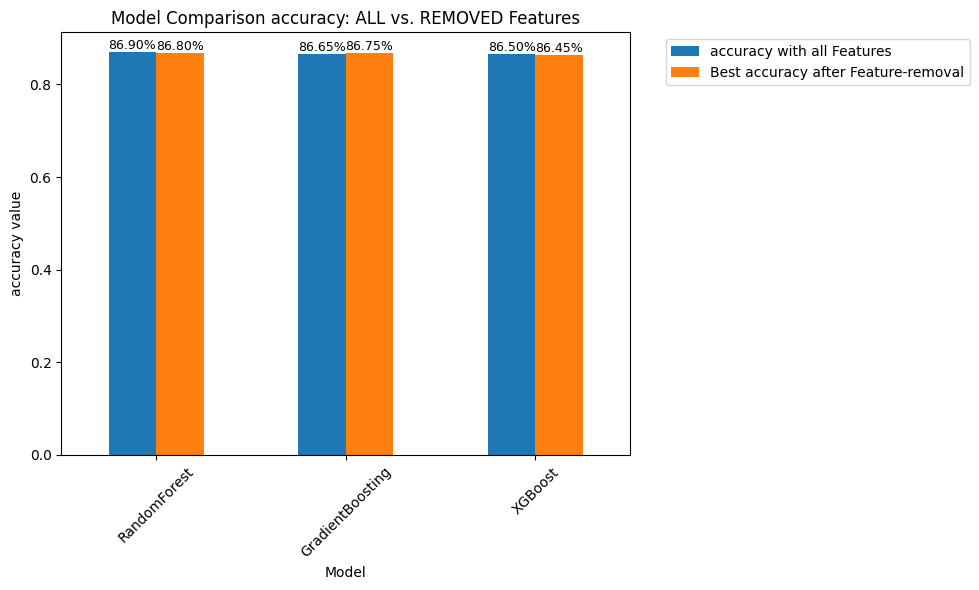

In [120]:
plot_comparison_feature_selection("accuracy")

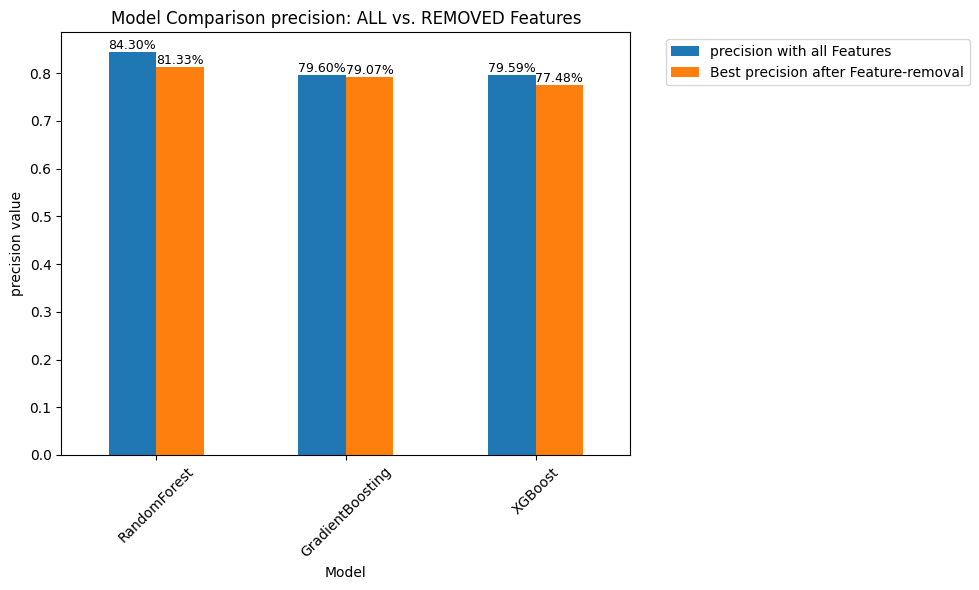

In [121]:
plot_comparison_feature_selection("precision")

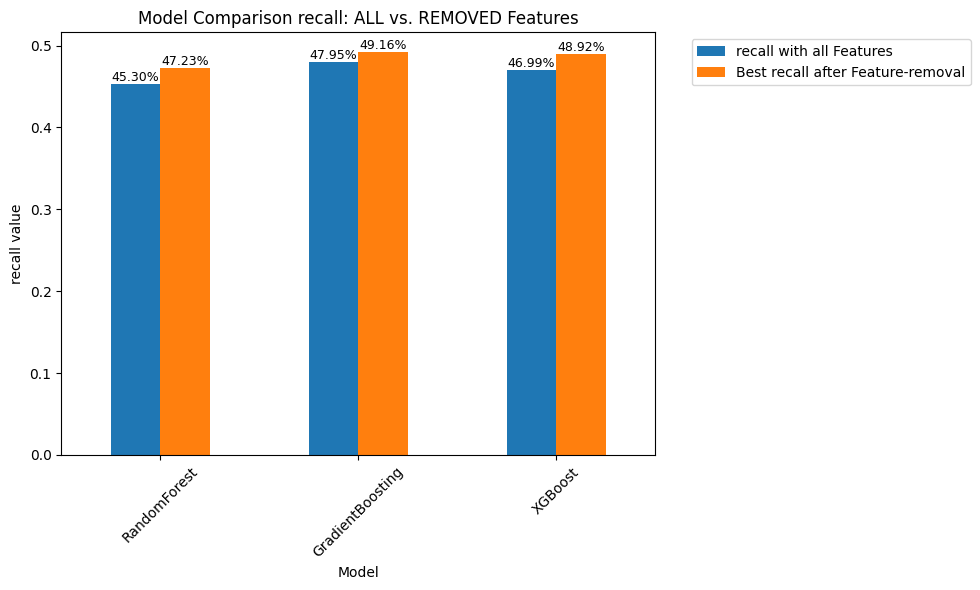

In [122]:
plot_comparison_feature_selection("recall")

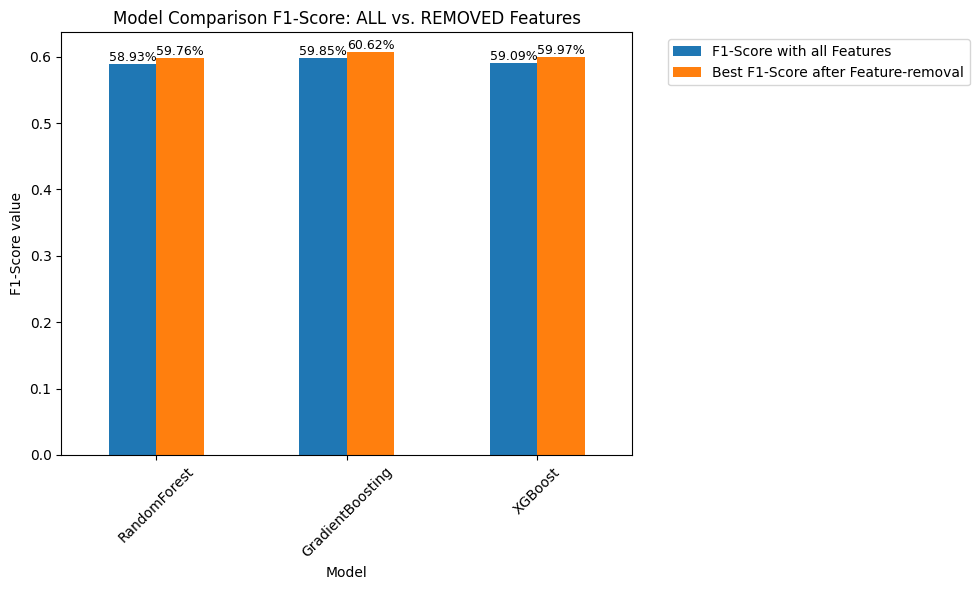

In [123]:
plot_comparison_feature_selection("F1-Score")

### <ins>Comparison of model performance before and after feature removal</ins>

### <ins>Accuracy</ins>
- **RandomForest**: Higher with all features **(86.90%)**
- **GradientBoosting**: Better after feature removal (86.75%)
- **XGBoost**: Better with all features (86.50%)

negligible difference (≈ 0.10%)

### <ins>Precision</ins>
- **RandomForest**: Highest with all features **(84.30%)**: better than feature removal (≈ 3%)
- **GradientBoosting**: Slightly better with all features (79.60%): small improvement (≈ 0.60%)
- **XGBoost**: Better with all features (79.59%): better than feature removal (≈ 2% )

### <ins>Recall</ins>
- **RandomForest**: Better after feature removal (47.23%)
- **GradientBoosting**: Highest after feature removal **(49.16%)**
- **XGBoost**: Better after feature removal (48.92%)

≈ 2% improvement for all models

### <ins>F1-Score </ins>
- **RandomForest**: Better after feature removal (59.76%)
- **GradientBoosting**: Highest after feature removal **(60.62%)**
- **XGBoost**: Better after feature removal (59.97%)

small improvment after feature removal (≈ 1%)

----
**GradientBoosting** performend best after feature removal, as it has the highest F1-Score (60.62%) and achieves the best recall value (40.16%).
Furhter we will investigate the models with Threshold optimazation

## <ins>Threshold optimazation with removed Features</ins>

### <ins>Random Forest</ins>

In [124]:
# create new X and y
X_rf_rf = df[best_features_fi_rf]
y_rf_rf = df["Exited"]

# train the model
X_train_rf_rf, X_test_rf_rf, y_train_rf_rf, y_test_rf_rf = train_model(X_rf_rf, y_rf_rf)

# creating Random Forest model with removed features
model_rf_rf = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 5, min_samples_leaf = 2, random_state = 1)

model_rf_rf.fit(X_train_rf_rf, y_train_rf_rf)
y_pred_rf_rf = model_rf_rf.predict(X_test_rf_rf)

# display metrics
print("---RANDOM FOREST before optimal threshold---")
display_metrics(y_test_rf_rf, y_pred_rf_rf)

---RANDOM FOREST before optimal threshold---
accuracy: 0.8680
precision: 0.8133
recall: 0.4723
F1-Score: 0.5976


In [125]:
# get optimal threshold with metrics
precisions_rf_rf, recalls_rf_rf, f1_scores_rf_rf, thresholds_rf_rf, optimal_threshold_rf_rf, y_pred_opt_rf_rf = find_optimal_threshold_and_metrics(model_rf_rf, X_test_rf_rf)

# display optimal threshold and metrics
print("---RANDOM FOREST with optimal threshold---")
print(f"Optimal Threshold with removed Features:", optimal_threshold_rf_rf)
print("\nMetrics for best Threshold")
display_metrics(y_test_rf_rf, y_pred_opt_rf_rf)

---RANDOM FOREST with optimal threshold---
Optimal Threshold with removed Features: 0.2818342953342954

Metrics for best Threshold
accuracy: 0.8455
precision: 0.6113
recall: 0.7012
F1-Score: 0.6532


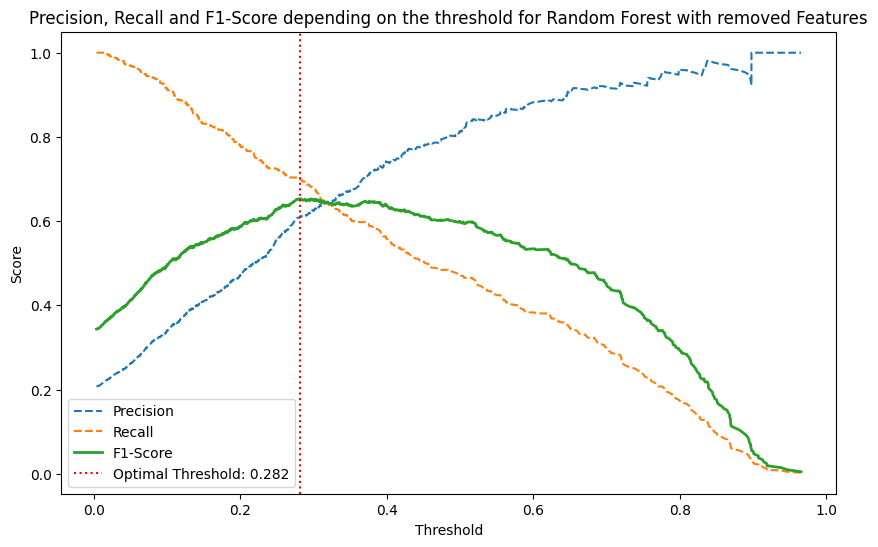

In [126]:
plot_optimal_threshold(precisions_rf_rf, recalls_rf_rf, f1_scores_rf_rf, thresholds_rf_rf, optimal_threshold_rf_rf, "Random Forest with removed Features")

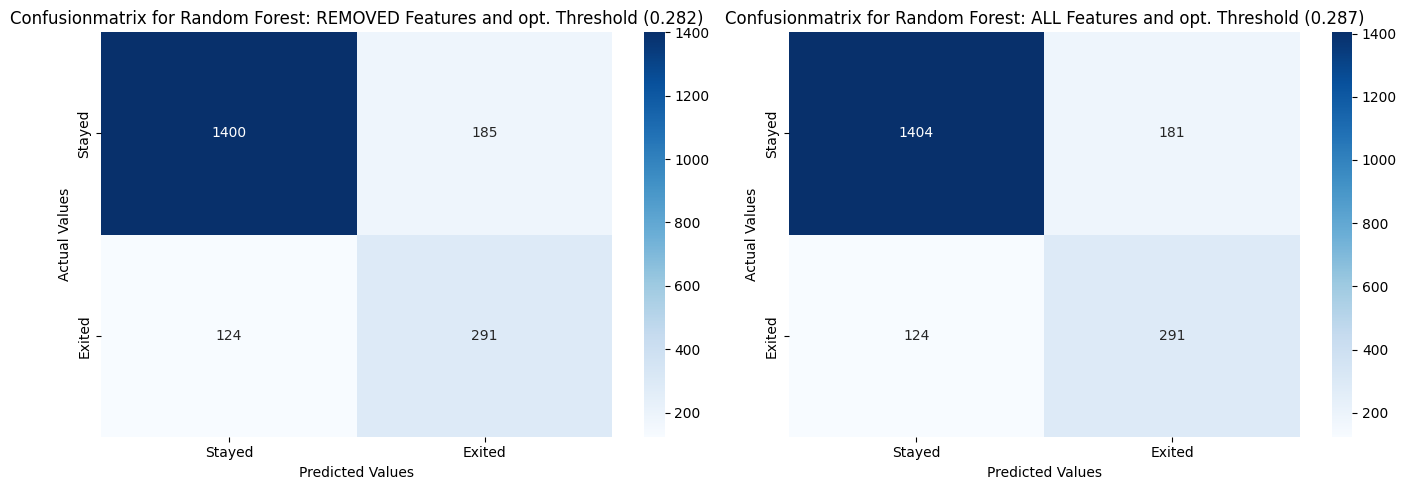

In [127]:
compare_confusion_matrices(
    y_test_rf_rf, y_pred_opt_rf_rf, f"Random Forest: REMOVED Features and opt. Threshold ({optimal_threshold_rf_rf:.3f})", 
    y_test, y_pred_opt_rf, f"Random Forest: ALL Features and opt. Threshold ({optimal_threshold_rf:.3f})"
)

### <ins>Gradient Boosting</ins>

In [128]:
# define new X, y
X_rf_gb = df[best_features_fi_gb]
y_rf_gb = df["Exited"]

# train model
X_train_rf_gb, X_test_rf_gb, y_train_rf_gb, y_test_rf_gb = train_model(X_rf_gb, y_rf_gb)

# creating GradientBoosting model with removed features
model_rf_gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.05, random_state = 1)

model_rf_gb.fit(X_train_rf_gb, y_train_rf_gb)
y_pred_rf_gb = model_rf_gb.predict(X_test_rf_gb)

# display metrics without opt. threshold
print("---GRADIENT BOOSTING before optimal threshold---")
display_metrics(y_test_rf_gb, y_pred_rf_gb)

---GRADIENT BOOSTING before optimal threshold---
accuracy: 0.8675
precision: 0.7907
recall: 0.4916
F1-Score: 0.6062


In [129]:
# get opt. threshold for Gradient Boosting
precisions_rf_gb, recalls_rf_gb, f1_scores_rf_gb, thresholds_rf_gb, optimal_threshold_rf_gb, y_pred_opt_rf_gb = find_optimal_threshold_and_metrics(model_rf_gb, X_test_rf_gb)

# display optimal threshold and metrics
print("---GRADIENT BOOSTING with optimal threshold---")
print(f"Optimal Threshold with removed Features:", optimal_threshold_rf_gb)
print("\nMetrics for best Threshold")
display_metrics(y_test_rf_gb, y_pred_rf_gb)

---GRADIENT BOOSTING with optimal threshold---
Optimal Threshold with removed Features: 0.3403478493997393

Metrics for best Threshold
accuracy: 0.8675
precision: 0.7907
recall: 0.4916
F1-Score: 0.6062


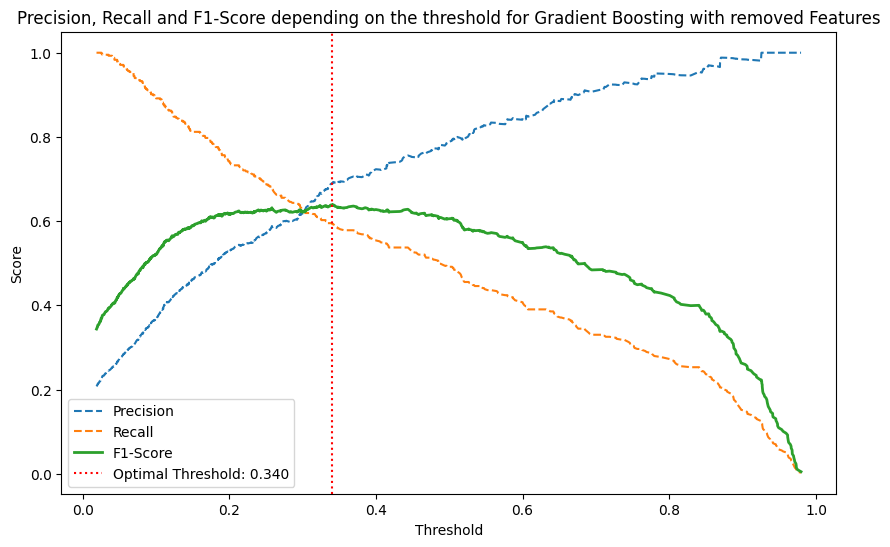

In [130]:
plot_optimal_threshold(precisions_rf_gb, recalls_rf_gb, f1_scores_rf_gb, thresholds_rf_gb, optimal_threshold_rf_gb, "Gradient Boosting with removed Features")

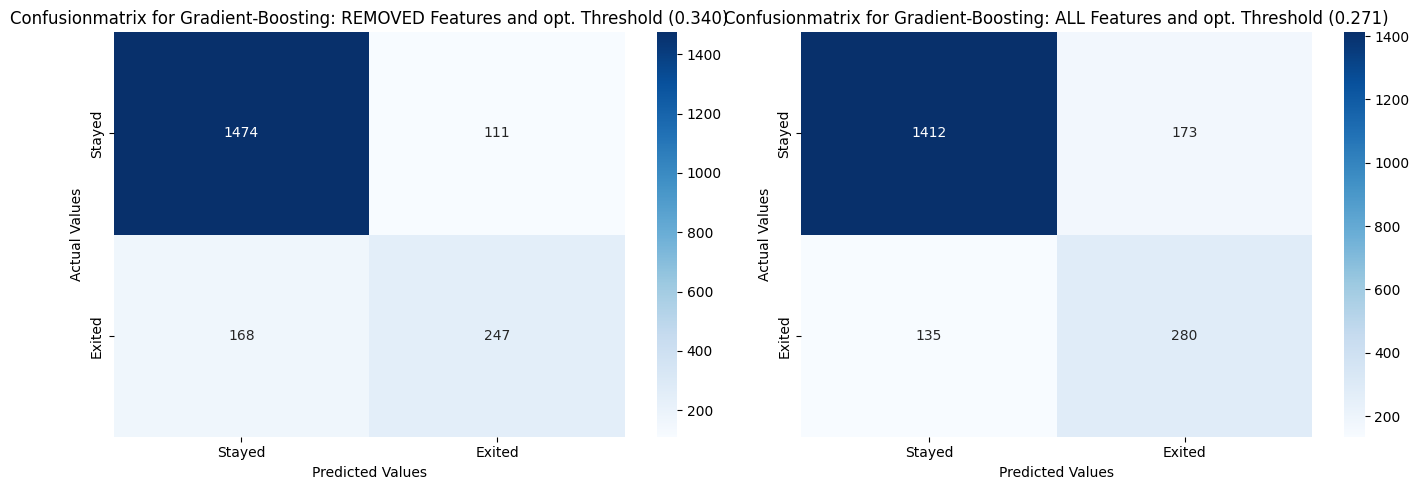

In [131]:
compare_confusion_matrices(
    y_test_rf_gb, y_pred_opt_rf_gb, f"Gradient-Boosting: REMOVED Features and opt. Threshold ({optimal_threshold_rf_gb:.3f})", 
    y_test, y_pred_opt_gb, f"Gradient-Boosting: ALL Features and opt. Threshold ({optimal_threshold_gb:.3f})"
)

### <ins>XGBoost</ins>

In [132]:
# define new X, y
X_rf_xgb = df[best_features_fi_xgb]
y_rf_xgb = df["Exited"]

# train model
X_train_rf_xgb, X_test_rf_xgb, y_train_rf_xgb, y_test_rf_xgb = train_model(X_rf_xgb, y_rf_xgb)

# creating XGBoost model with removed features
model_rf_xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.05, min_child_weight = 1, reg_alpha = 0.1, subsample = 0.8, random_state = 1)

model_rf_xgb.fit(X_train_rf_xgb, y_train_rf_xgb)
y_pred_rf_xgb = model_rf_xgb.predict(X_test_rf_xgb)

# display metrics without opt. threshold
print("---XGBOOST before optimal threshold---")
display_metrics(y_test_rf_xgb, y_pred_rf_xgb)

---XGBOOST before optimal threshold---
accuracy: 0.8645
precision: 0.7748
recall: 0.4892
F1-Score: 0.5997


In [133]:
precisions_rf_xgb, recalls_rf_xgb, f1_scores_rf_xgb, thresholds_rf_xgb, optimal_threshold_rf_xgb, y_pred_opt_rf_xgb = find_optimal_threshold_and_metrics(model_rf_xgb, X_test_rf_xgb)

# display optimal threshold and metrics
print("---XGBOOSTG with optimal threshold---")
print(f"Optimal Threshold with removed Features:", optimal_threshold_rf_xgb)
print("\nMetrics for best Threshold")
display_metrics(y_test_rf_xgb, y_pred_rf_xgb)

---XGBOOSTG with optimal threshold---
Optimal Threshold with removed Features: 0.37108296

Metrics for best Threshold
accuracy: 0.8645
precision: 0.7748
recall: 0.4892
F1-Score: 0.5997


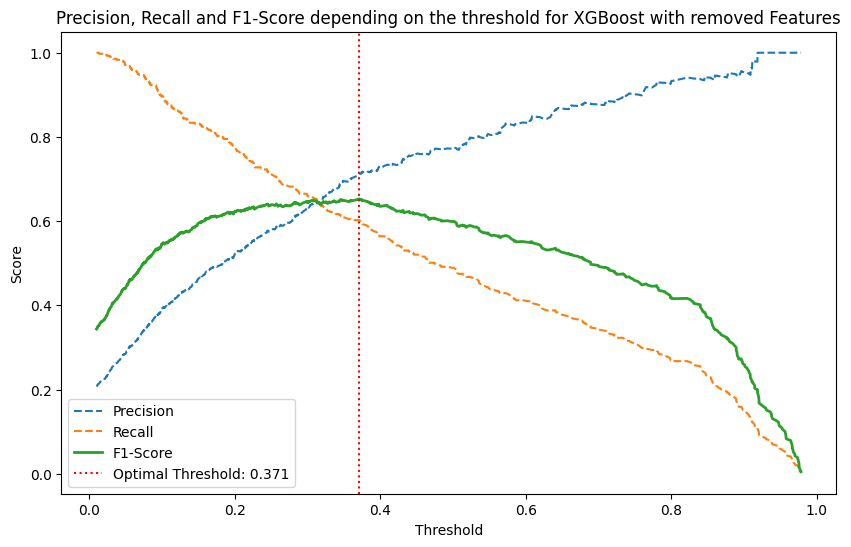

In [134]:
plot_optimal_threshold(precisions_rf_xgb, recalls_rf_xgb, f1_scores_rf_xgb, thresholds_rf_xgb, optimal_threshold_rf_xgb, "XGBoost with removed Features")

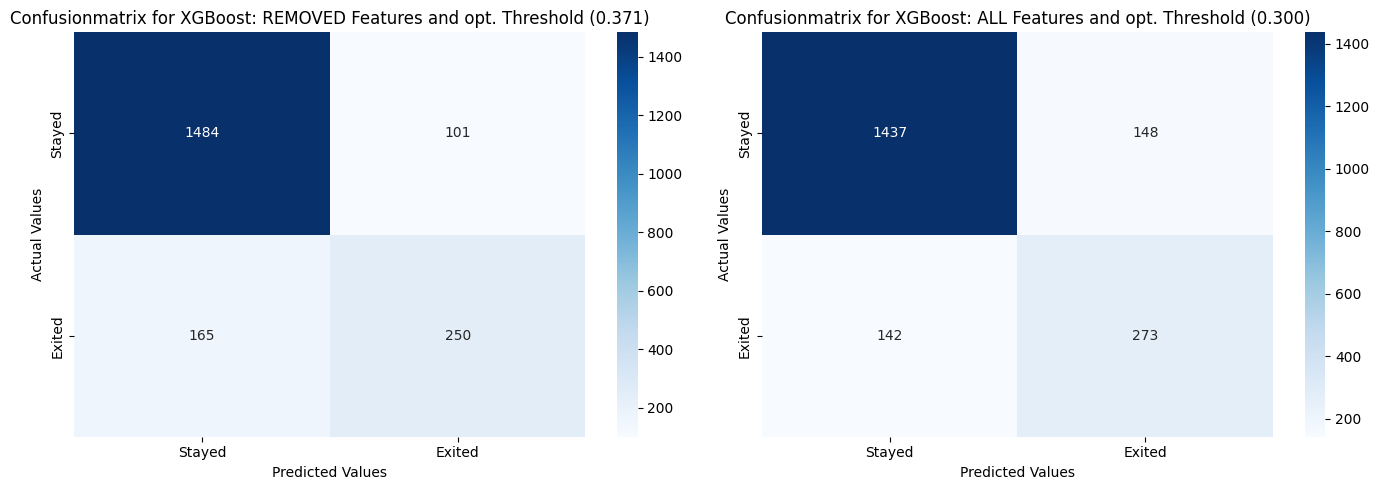

In [135]:
compare_confusion_matrices(
    y_test_rf_xgb, y_pred_opt_rf_xgb, f"XGBoost: REMOVED Features and opt. Threshold ({optimal_threshold_rf_xgb:.3f})", 
    y_test, y_pred_opt_xgb, f"XGBoost: ALL Features and opt. Threshold ({optimal_threshold_xgb:.3f})"
)

## <ins>Comparision of Matrices after Threshold Optimazation with removed Features</ins>

### <ins>`Random Forest` vs. `Gradient Boosting` </ins>

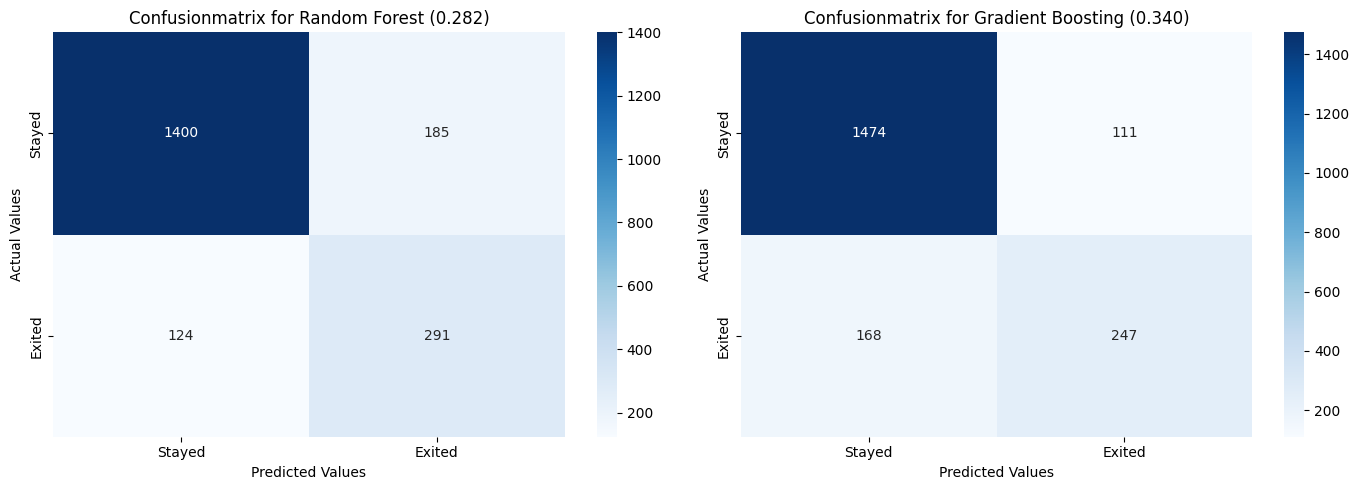

In [136]:
compare_confusion_matrices(
    y_test_rf_rf, y_pred_opt_rf_rf, f"Random Forest ({optimal_threshold_rf_rf:.3f})", 
    y_test_rf_gb, y_pred_opt_rf_gb, f"Gradient Boosting ({optimal_threshold_rf_gb:.3f})"
)

### <ins>`Random Forest` vs. `XGBoost` </ins>

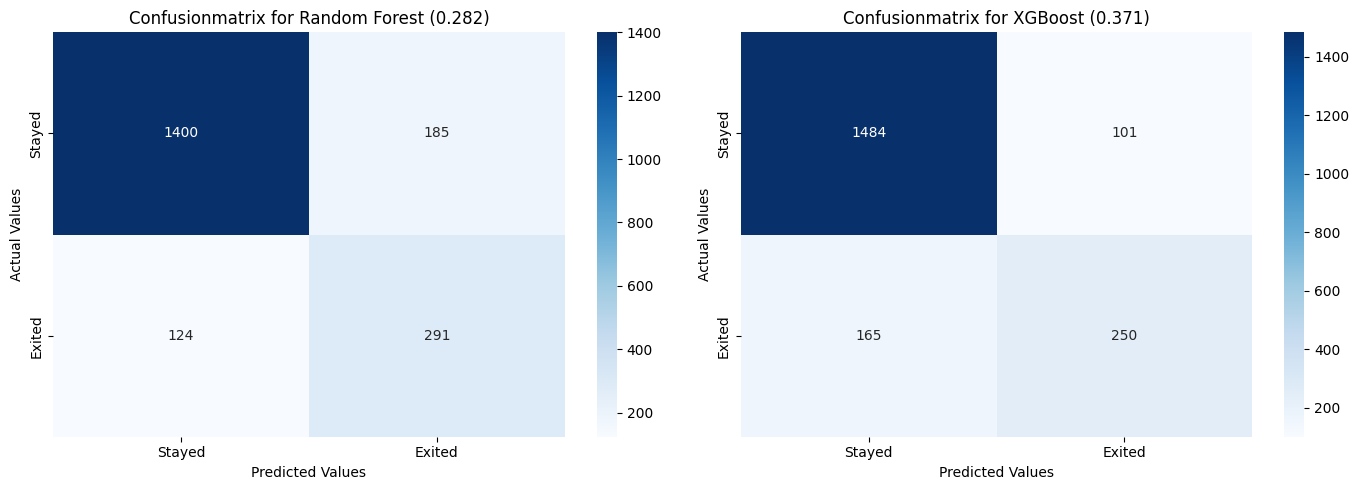

In [137]:
compare_confusion_matrices(
    y_test_rf_rf, y_pred_opt_rf_rf, f"Random Forest ({optimal_threshold_rf_rf:.3f})", 
    y_test_rf_xgb, y_pred_opt_rf_xgb, f"XGBoost ({optimal_threshold_rf_xgb:.3f})"
)

### <ins>`Gradient Boosting` vs. `XGBoost` </ins>

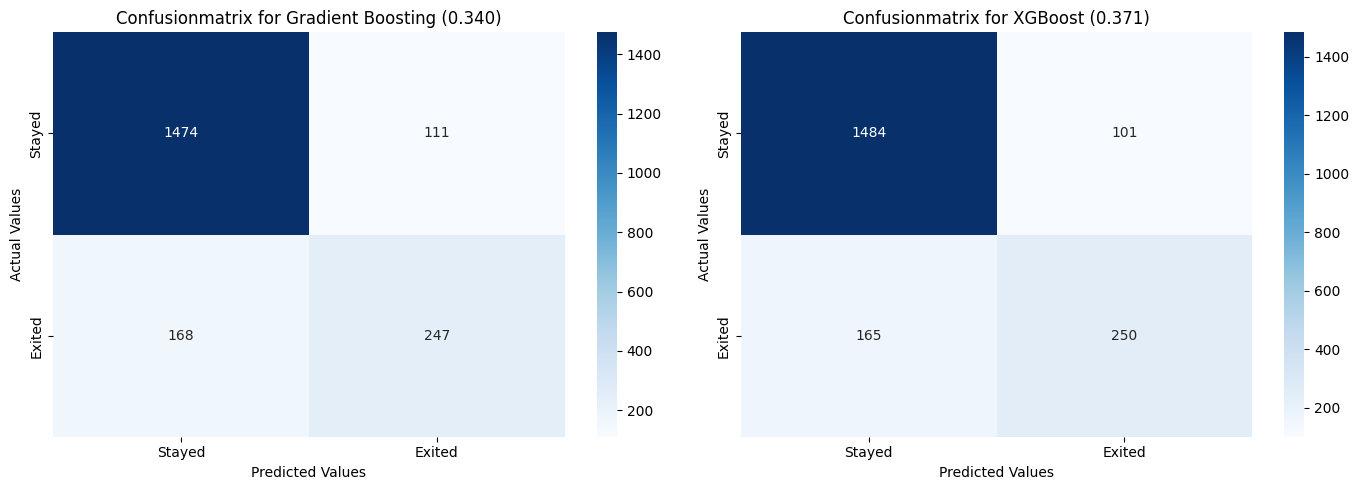

In [138]:
compare_confusion_matrices(
    y_test_rf_gb, y_pred_opt_rf_gb, f"Gradient Boosting ({optimal_threshold_rf_gb:.3f})", 
    y_test_rf_xgb, y_pred_opt_rf_xgb, f"XGBoost ({optimal_threshold_rf_xgb:.3f})"
)

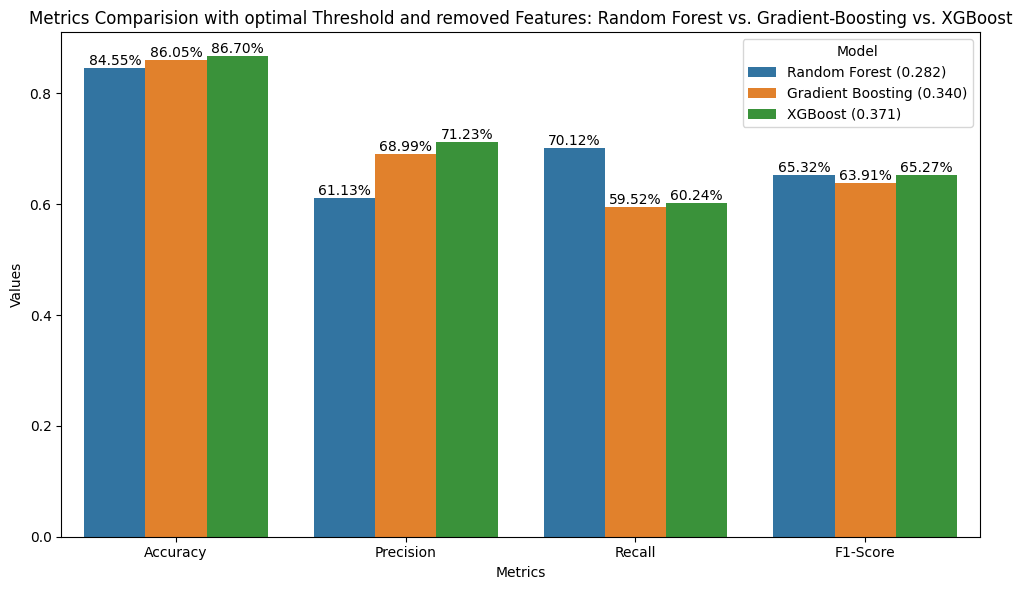

In [139]:
# plotting comparision of two models by metrics 
# metrics for both models with optimal Threshold
metrics_rf_rf  = calculate_metrics(y_test_rf_rf, y_pred_opt_rf_rf)
metrics_rf_gb  = calculate_metrics(y_test_rf_gb, y_pred_opt_rf_gb)
metrics_rf_xgb = calculate_metrics(y_test_rf_xgb, y_pred_opt_rf_xgb)

# dataframe of metrics
metrics_rf_df = pd.DataFrame({
    'Metric'                   : ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest (0.282)'    : [metrics_rf_rf['accuracy'], metrics_rf_rf['precision'], metrics_rf_rf['recall'], metrics_rf_rf['F1-Score']],
    'Gradient Boosting (0.340)': [metrics_rf_gb['accuracy'], metrics_rf_gb['precision'], metrics_rf_gb['recall'], metrics_rf_gb['F1-Score']],
    'XGBoost (0.371)'          : [metrics_rf_xgb['accuracy'], metrics_rf_xgb['precision'], metrics_rf_xgb['recall'], metrics_rf_xgb['F1-Score']]
})

# convert DataFrame to Long Format
metrics_long_rf_df = metrics_rf_df.melt(id_vars = ['Metric'], var_name = 'Model', value_name = 'Value')

# visualization
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Metric', y = 'Value', hue = 'Model', data = metrics_long_rf_df)

# add percentage to bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.2%}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black')

# define labels
plt.title("Metrics Comparision with optimal Threshold and removed Features: Random Forest vs. Gradient-Boosting vs. XGBoost")
plt.xlabel("Metrics")
plt.ylabel("Values")

plt.tight_layout()
plt.show()

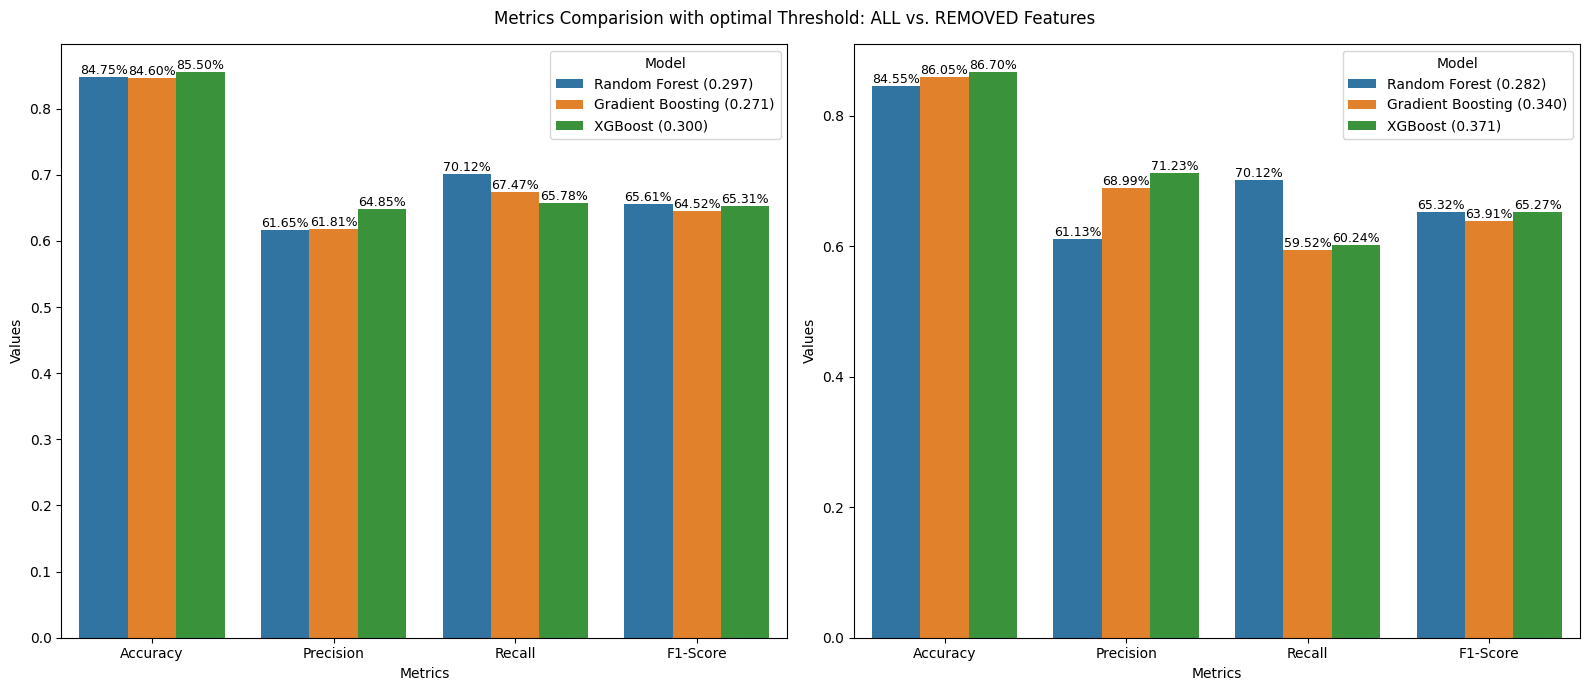

In [140]:
plt.figure(figsize = (16, 7))
# plotting comparision of two models by metrics 
# metrics for all features and optimal Threshold
metrics_rf  = calculate_metrics(y_test, y_pred_opt_rf)
metrics_gb  = calculate_metrics(y_test, y_pred_opt_gb)
metrics_xgb = calculate_metrics(y_test, y_pred_opt_xgb)

# dataframe of metrics
metrics_df = pd.DataFrame({
    'Metric'                   : ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest (0.297)'    : [metrics_rf['accuracy'], metrics_rf['precision'], metrics_rf['recall'], metrics_rf['F1-Score']],
    'Gradient Boosting (0.271)': [metrics_gb['accuracy'], metrics_gb['precision'], metrics_gb['recall'], metrics_gb['F1-Score']],
    'XGBoost (0.300)'          : [metrics_xgb['accuracy'], metrics_xgb['precision'], metrics_xgb['recall'], metrics_xgb['F1-Score']]
})

# convert DataFrame to Long Format
metrics_long_df = metrics_df.melt(id_vars = ['Metric'], var_name = 'Model', value_name = 'Value')

# visualization
plt.subplot(1, 2, 1)

ax = sns.barplot(x = 'Metric', y = 'Value', hue = 'Model', data = metrics_long_df)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.2%}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel("Metrics")
plt.ylabel("Values")


plt.subplot(1, 2, 2)
# plotting comparision of two models by metrics 
# metrics for both models with optimal Threshold
metrics_rf_rf  = calculate_metrics(y_test_rf_rf, y_pred_opt_rf_rf)
metrics_rf_gb  = calculate_metrics(y_test_rf_gb, y_pred_opt_rf_gb)
metrics_rf_xgb = calculate_metrics(y_test_rf_xgb, y_pred_opt_rf_xgb)

# dataframe of metrics
metrics_rf_df = pd.DataFrame({
    'Metric'                   : ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest (0.282)'    : [metrics_rf_rf['accuracy'], metrics_rf_rf['precision'], metrics_rf_rf['recall'], metrics_rf_rf['F1-Score']],
    'Gradient Boosting (0.340)': [metrics_rf_gb['accuracy'], metrics_rf_gb['precision'], metrics_rf_gb['recall'], metrics_rf_gb['F1-Score']],
    'XGBoost (0.371)'          : [metrics_rf_xgb['accuracy'], metrics_rf_xgb['precision'], metrics_rf_xgb['recall'], metrics_rf_xgb['F1-Score']]
})

# convert DataFrame to Long Format
metrics_long_rf_df = metrics_rf_df.melt(id_vars = ['Metric'], var_name = 'Model', value_name = 'Value')

# visualization
ax = sns.barplot(x = 'Metric', y = 'Value', hue = 'Model', data = metrics_long_rf_df)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.2%}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel("Metrics")
plt.ylabel("Values")

plt.suptitle("Metrics Comparision with optimal Threshold: ALL vs. REMOVED Features")
plt.tight_layout()
plt.show()

In [141]:
# function that compares models each metric
def compare_models(models_prediction, y_test):
    best_models = {"accuracy": (None, 0), "precision": (None, 0), "recall": (None, 0), "F1-Score": (None, 0)}
    
    for name, y_pred in models_prediction.items():
        metrics = calculate_metrics(y_test, y_pred)
        
        for metric, value in metrics.items():
            if value > best_models[metric][1]:
                best_models[metric] = (name, value)
                
    return {metric: model[0] for metric, model in best_models.items()}

In [142]:
# compare metrics from all models and display the best models each metric with REMOVED feature
models_prediction_rf = {
    "Random Forest": y_pred_opt_rf_rf,
    "Gradient Boosting": y_pred_opt_rf_gb,
    "XGBoost": y_pred_opt_rf_xgb
}

best_models = compare_models(models_prediction_rf, y_test)
print("---Best Model each Metric with REMOVED Features---")
print(best_models)

---Best Model each Metric with REMOVED Features---
{'accuracy': 'XGBoost', 'precision': 'XGBoost', 'recall': 'Random Forest', 'F1-Score': 'Random Forest'}


In [143]:
# compare metrics from all models and display the best models each metric with ALL feature
models_prediction = {
    "Random Forest": y_pred_opt_rf,
    "Gradient Boosting": y_pred_opt_gb,
    "XGBoost": y_pred_opt_xgb
}

best_models = compare_models(models_prediction, y_test)
print("---Best Model each Metric with ALL Features---")
print(best_models)

---Best Model each Metric with ALL Features---
{'accuracy': 'XGBoost', 'precision': 'XGBoost', 'recall': 'Random Forest', 'F1-Score': 'Random Forest'}


### **<ins>Analysis of the models**</ins>

**<ins>With features removed</ins>**  
- **Highest Accuracy:** XGBoost (86.70%)  
- **Best Precision:** XGBoost (71.23%)  
- **Highest Recall:** Random Forest (70.12%)  
- **Best F1 Score:** Random Forest (65.32%)  

**Random Forest** has the highest recall, meaning it detects the most churning customers. However, **XGBoost** has the best precision, so there are fewer false alarms.  

**<ins>With all features</ins>**  
- **Highest Accuracy:** XGBoost (85.50%)  
- **Best Precision:** XGBoost (64.85%)  
- **Highest Recall:** Random Forest (70.12%)  
- **Best F1 Score:** Random Forest (65.61%)  

A similar picture emerges here: **Random Forest** has the highest recall, but **XGBoost** has a better balance with precision and accuracy.  

---

### **<ins>What Model should be taken?</ins>**
Since recall is crucial for banks to predict as many churning customers as possible, **Random Forest** would be the best choice.  
However, **XGBoost** has better overall performance with higher accuracy and precision, meaning it makes more precise predictions. The reduction of features in **XGBoost** leads to a significant drop in recall, which is undesirable in our use case. With **Random Forest**, however, the recall does not seem to get worse, so it makes more sense to use all the features here so as not to lose potentially important information. 

**<ins>Recommended decision:</ins>**  
- If it is absolutely critical not to miss any exit customers → **Random Forest** (highest recall).  
- If a balance between accuracy and precision is important → **XGBoost** (better precision and accuracy).  

After considering all aspects, I choose the **`Random Forest`** model using `all features` as this setup best suits the business needs, especially when it comes to high recall. Since banks want to minimize false alarms and detect as many churners as possible to reduce costs.

### <ins>Save Dataframe for web-app</ins>

In [144]:
DATAFRAME_PATH = "data/Processed_Customer_Churn_Data.csv"
df.to_csv(DATAFRAME_PATH, index = False) # index column (0,1,3,...) is not written to the CSV-file
print(f"Dataframe saved successfully in {DATAFRAME_PATH}!")

Dataframe saved successfully in data/Processed_Customer_Churn_Data.csv!


## <ins>Recommendations</ins>

- Personalized retention campaigns: Tailor marketing and promotional offers to meet the specific needs and preferences of customers who are at risk of leaving. By providing targeted incentives and solutions, the bank can encourage these customers to stay.

- Improve customer service: Enhance the overall customer experience by ensuring prompt and efficient support, addressing customer complaints effectively, and offering proactive assistance. By providing exceptional service, the bank can strengthen customer loyalty and reduce the likelihood of churn.

- Foster customer loyalty programs: Introduce loyalty programs, rewards, and exclusive benefits for long-standing customers. By offering incentives for continued engagement, the bank can encourage customers to remain loyal and reduce the temptation to switch to competitors.


- The bank can launch a scheme for customers with higher ages (Senior Citizens) so that they not deactivate their banking facilities.

- The bank can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.
